In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math
from scipy import stats

**Contributers:**
- **Rawan Reda**
- **Hadeer ElHussein**
- **Maryam ElOraby**

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
# import pandas as pd
# df = pd.read_csv('/content/drive/MyDrive/1985_Accidents_UK.csv', index_col = 'accident_index')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [12]:
df = pd.read_csv('1985_Accidents_UK.csv', index_col='accident_index')

# EDA

There were in total 245645 recorded accidents in 1985

In [13]:
print(f"Shape: {df.shape}")
df.head() 

Shape: (245645, 35)


,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
accident_index,,,,,,,,,,,,,,,,,,,,,
198501AD00001,1985,01AD00001,530180.0,179670.0,NaN,NaN,Metropolitan Police,Slight,1,1,...,Pedestrian phase at traffic signal junction,Daylight,Fine no high winds,Dry,None,None,Data missing or out of range,Data missing or out of range,Data missing or out of range,-1
198501AD00002,1985,01AD00002,530020.0,180510.0,NaN,NaN,Metropolitan Police,Slight,2,1,...,Zebra,Darkness - lights lit,Fine no high winds,Dry,None,None,Data missing or out of range,Data missing or out of range,Data missing or out of range,-1
198501AD00003,1985,01AD00003,528360.0,179760.0,NaN,NaN,Metropolitan Police,Slight,2,1,...,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Data missing or out of range,Data missing or out of range,Data missing or out of range,-1
198501AD00004,1985,01AD00004,530400.0,180290.0,NaN,NaN,Metropolitan Police,Slight,2,1,...,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Wet or damp,None,None,Data missing or out of range,Data missing or out of range,Data missing or out of range,-1
198501AD00005,1985,01AD00005,530150.0,179690.0,NaN,NaN,Metropolitan Police,Slight,1,1,...,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Data missing or out of range,Data missing or out of range,Data missing or out of range,-1


In [14]:
# Count of each data type present in the dataset
pd.value_counts(df.dtypes)

object     24
int64       6
float64     5
dtype: int64

### Checking value counts in each column in the dataset to detect different unclean data and abnormalities

In [15]:
for c in df.columns:
  print(f'Column name: {c}')
  print("Values: ")
  print(df[c].value_counts())
  print("-"*20)

Column name: accident_year
Values: 
1985    245645
Name: accident_year, dtype: int64
--------------------
Column name: accident_reference
Values: 
01AD00001    1
43C036055    1
43C035055    1
43C035065    1
43C035075    1
            ..
125216709    1
125216893    1
125216949    1
125216975    1
98T039180    1
Name: accident_reference, Length: 245645, dtype: int64
--------------------
Column name: location_easting_osgr
Values: 
383800.0    138
384400.0    135
392400.0    121
385700.0    121
391800.0    120
           ... 
171500.0      1
166960.0      1
170070.0      1
171060.0      1
200010.0      1
Name: location_easting_osgr, Length: 34058, dtype: int64
--------------------
Column name: location_northing_osgr
Values: 
188400.0    117
398500.0    109
66490.0     101
398300.0    100
398200.0     98
           ... 
613950.0      1
337240.0      1
117080.0      1
334380.0      1
504790.0      1
Name: location_northing_osgr, Length: 42557, dtype: int64
--------------------
Column name: l

### Duplicates

In [16]:
data_minus_ref = df.drop(['accident_reference'],axis=1)
data_minus_ref[data_minus_ref.duplicated(keep = 'first')]

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
accident_index,,,,,,,,,,,,,,,,,,,,,
198501AR00067,1985,528360.0,179750.0,NaN,NaN,Metropolitan Police,Slight,2,1,19/02/1985,...,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Data missing or out of range,Data missing or out of range,Data missing or out of range,-1
198501AR00128,1985,529070.0,179260.0,NaN,NaN,Metropolitan Police,Slight,2,2,22/06/1985,...,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Data missing or out of range,Data missing or out of range,Data missing or out of range,-1
198501AR00210,1985,529920.0,179490.0,NaN,NaN,Metropolitan Police,Slight,1,1,13/09/1985,...,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Data missing or out of range,Data missing or out of range,Data missing or out of range,-1
198501CV00112,1985,529750.0,180710.0,NaN,NaN,Metropolitan Police,Slight,1,1,18/04/1985,...,Pedestrian phase at traffic signal junction,Daylight,Fine no high winds,Dry,None,None,Data missing or out of range,Data missing or out of range,Data missing or out of range,-1
198501DM00010,1985,527450.0,181240.0,NaN,NaN,Metropolitan Police,Slight,3,1,09/01/1985,...,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Wet or damp,None,None,Data missing or out of range,Data missing or out of range,Data missing or out of range,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198554MA03705,1985,382300.0,179800.0,NaN,NaN,Wiltshire,Slight,1,1,19/09/1985,...,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Data missing or out of range,Data missing or out of range,Data missing or out of range,-1
198561B20985P,1985,326900.0,202700.0,NaN,NaN,Gwent,Slight,1,1,30/05/1985,...,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Data missing or out of range,Data missing or out of range,Data missing or out of range,-1
1985620C08070,1985,318480.0,176160.0,NaN,NaN,South Wales,Slight,1,1,22/02/1985,...,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Data missing or out of range,Data missing or out of range,Data missing or out of range,-1


We have 92 duplicates in the dataset. We will drop these rows as they are redundant. 


In [17]:
df.drop_duplicates(subset=df.columns.difference(['accident_reference']), inplace= True)

In [18]:
len(df)

245553

### Exploring Missing Values

accident_year                                       0
accident_reference                                  0
location_easting_osgr                              26
location_northing_osgr                             26
longitude                                      245553
latitude                                       245553
police_force                                        0
accident_severity                                   0
number_of_vehicles                                  0
number_of_casualties                                0
date                                                0
day_of_week                                         0
time                                                0
local_authority_district                            0
local_authority_ons_district                        0
local_authority_highway                             0
first_road_class                                    0
first_road_number                                  14
road_type                   

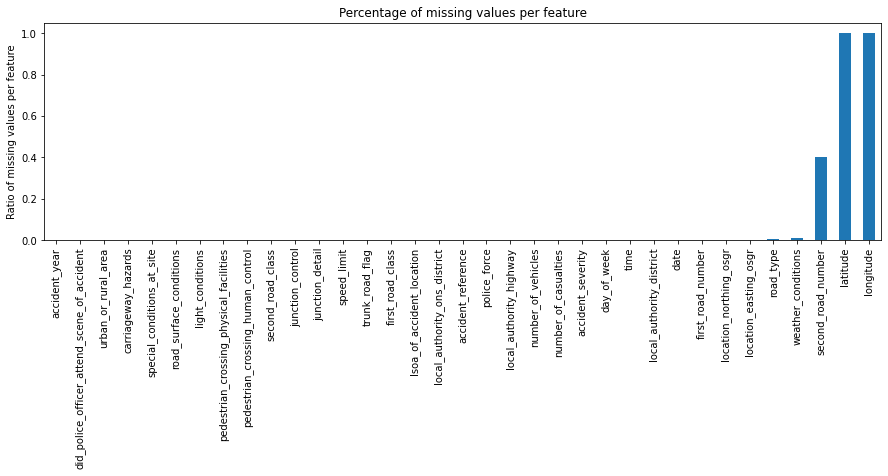

In [19]:
print(df.isnull().sum())
df.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4),
    title="Percentage of missing values per feature",
    ylabel="Ratio of missing values per feature");

- No longitude or latitude were recorded for accidents in 1985. However easting and northing could be used instead to get the locations. Only 26 rows are missing easting and northing values.

- A big portion of second_road_number is missing (~ 40.0). Upon further research, we figured out that second_road_number is the class of the second road on which the accident occurred if the accident happened at a junction.

- first_road_class, first_road_number, weather_conditions, speed_limit, road_type also had missing values

## What are the features of the accident with the highest number of causalities in 1985?

In [20]:
df[df.number_of_casualties == df.number_of_casualties.max()].T

accident_index,1985040DC1467
accident_year,1985
accident_reference,040DC1467
location_easting_osgr,352370.0
location_northing_osgr,438740.0
longitude,NaN
latitude,NaN
police_force,Lancashire
accident_severity,Fatal
number_of_vehicles,15
number_of_casualties,51


The accident with the highest number of casualities in 1985 seemed to happen at a junction in broad daylight on a dry road

We can find further details about this accident here:
https://www.upi.com/Archives/1985/10/21/A-bus-crashed-and-burst-into-flames-in-a/3356498715200/

## Accident severity

### Is there a relationship between the accident severity and the avg # of causalities? 

Text(0.5, 1.0, 'relationship between avg # of causalities and severity')

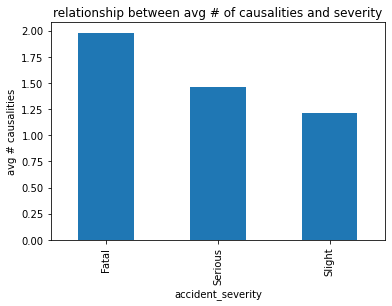

In [21]:
df_sev_casualities=df.groupby(['accident_severity']).mean()['number_of_casualties']
df_sev_casualities.plot.bar(x = 'severity', y ='avg # casualities')
plt.ylabel('avg # causalities')
plt.title('relationship between avg # of causalities and severity')

We could deduce that the higher the number of the casualities, the more severe an accident is.

## Plotting figures to answer questions


### Does pedestrian crossing have an effect on the accidents rate? 

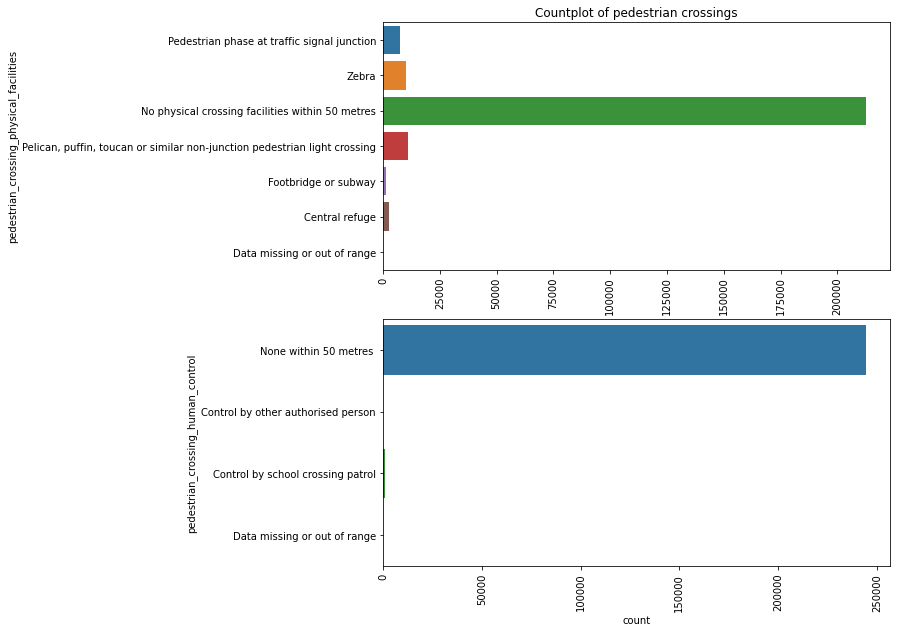

In [22]:
plt.figure(figsize=(20, 10))
plt.subplot(2,2,1)
plt.title('Countplot of pedestrian crossings')
sns.countplot(y ='pedestrian_crossing_physical_facilities', data = df)
plt.xticks(rotation=90)
plt.subplot(2,2,3)
sns.countplot(y ='pedestrian_crossing_human_control', data = df)
plt.xticks(rotation=90)
plt.show()


we can deduce from this data that most of the accidents are not as a result of pedestrian crossing as the largest accident count was present where there is no physical crossing facilities within 50m in the case of pedestrian_crossing_physical_facilities and None within 50m in the case of pedestrian_crossing_human_control. However, in pedestrian_crossing_physical_facilities, excluding 'no phycical crossing within 50m', we can deduce that light crossing has a relativley slightly higher effect, followed by Zebra, and followed by trafic signal junction, but the number is not significant. Furthermore, pedestrian_crossing_human_control does not seem to have any effect on accidents rate. 

We can deduce that the presence of a pedestrian crossing is not a main cause of accidents. 

### What effect does the different road features have on accident counts?


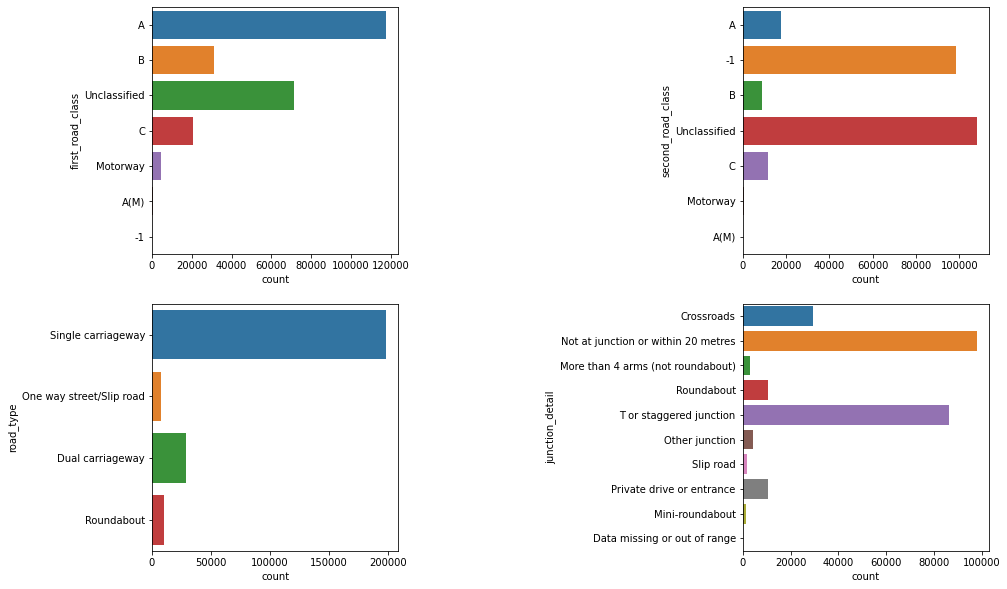

In [23]:
#Road class, road type, junction detail

plt.figure(figsize=(15, 10))
plt.subplot(2,3,1)
sns.countplot(y ='first_road_class', data = df)
plt.subplot(2,3,3)
sns.countplot(y ='second_road_class', data = df)
plt.subplot(2,3,4)
sns.countplot(y ='road_type', data = df)
plt.subplot(2,3,6)
sns.countplot(y ='junction_detail', data = df)
plt.show()

Considering all road features separately, we can see that the most common value for a first_road_type is A and the most common value for second_road_type is Unclassified and the most common road_type if Single carriageway and the most commmon junction detail is staggered junction, however the absence of junction_detail is more common.

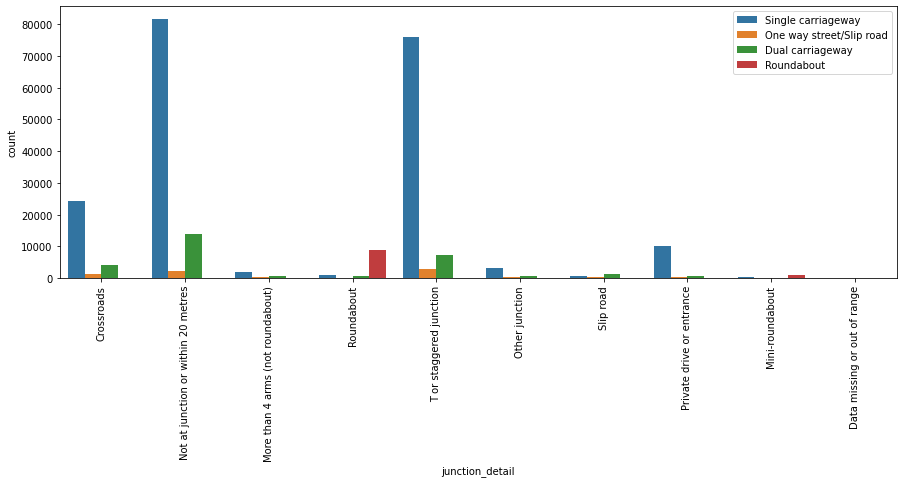

In [24]:
plt.figure(figsize=(15, 5))
sns.countplot(x='junction_detail', hue='road_type', data = df)
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.show()

Single Carriageway road type is the most common for absence of juncion and T junction. 

Text(0.5, 1.0, 'Countplot of accidents for different first and second road combinations')

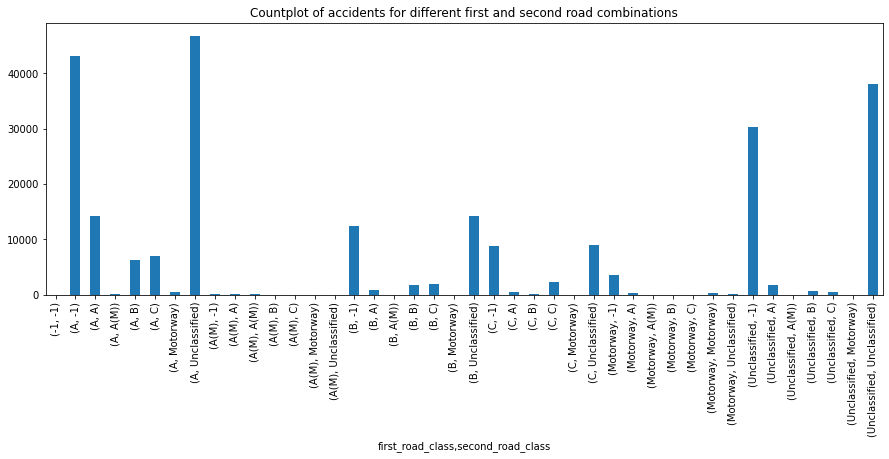

In [25]:
df_road_combination=df.groupby(['first_road_class', 'second_road_class']).count()['accident_reference']
df_road_combination.plot.bar(figsize=(15,5))
plt.title('Countplot of accidents for different first and second road combinations')

Most of the instances where there is a high count of accidents involve an Unclassified or -1 second road type.  A combination of 'A' and 'Unclassified' leads to the highest number of accidents.

#### What is the speed limit per each road class?

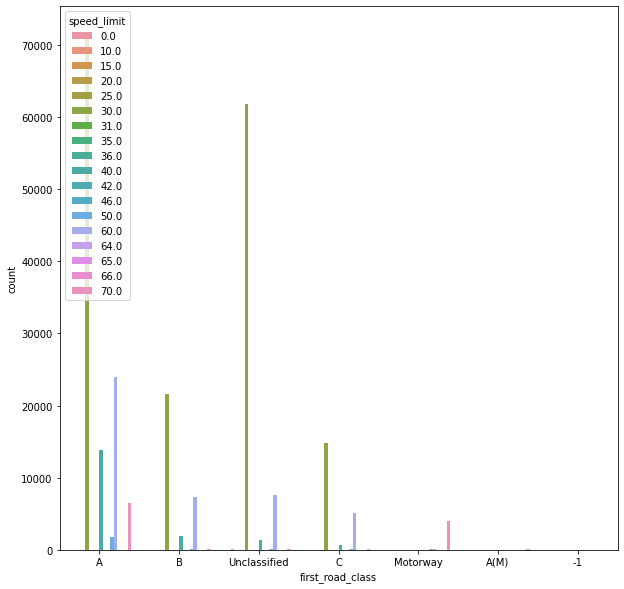

In [26]:
plt.figure(figsize=(10,10))
sns.countplot(x='first_road_class', data=df, hue = 'speed_limit')
plt.show()

A speed limit of 30 has the higest count of accidents in road classes: A,B, Unclassified, and C.

#### Correlation between first road class and road type

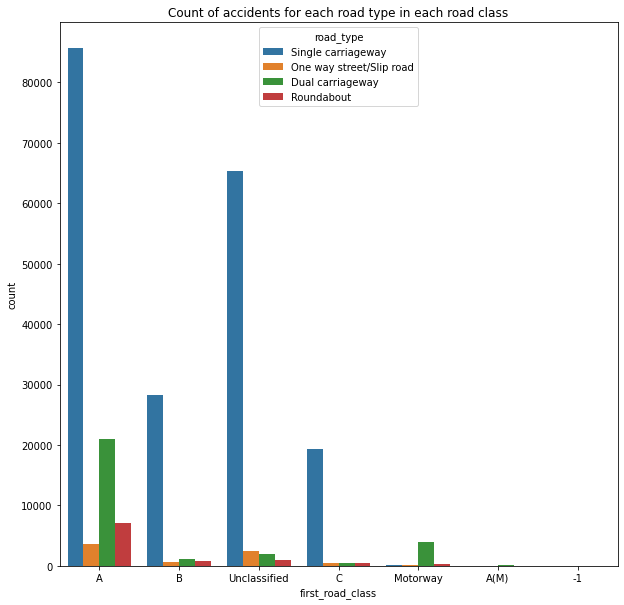

In [27]:
plt.figure(figsize=(10,10))
sns.countplot(x='first_road_class', data=df, hue = 'road_type')
plt.title('Count of accidents for each road type in each road class')
plt.show()

Single Carriageway is the higest amoong A, B, Unclassefied and C road types. Also, the occurence of Dual Carriageway as the cause of accident is highest in road class A. 

### How does the accident severity differ with each road feature?

most of the accident severity in the dataset are Slight. 

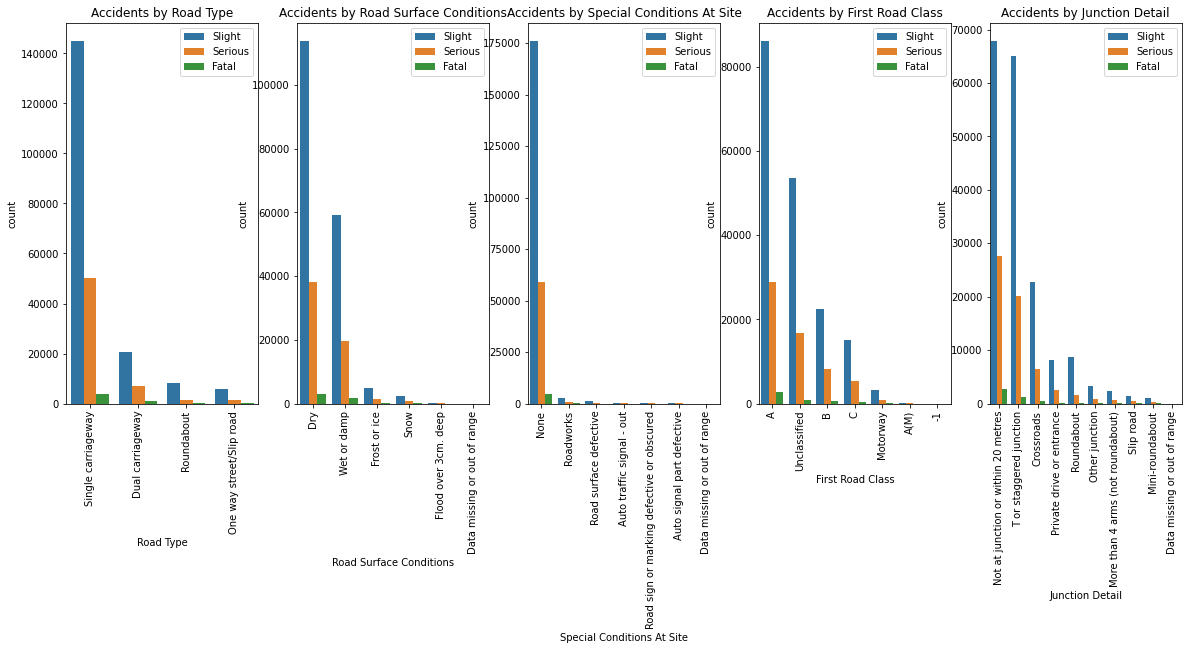

In [28]:
def plot_countplt_with_sev(df, col_name):

  col_title = col_name.replace('_', ' ').title()
  sns.countplot(x=col_name, data=df, order = df[col_name].value_counts().index, hue="accident_severity")
  plt.xlabel(col_title)
  plt.xticks(rotation=90)
  plt.title('Accidents by ' + col_title)
  plt.legend(loc='upper right')


plt.figure(figsize=(20, 7))
plt.tight_layout()
plt.subplot(1,5,1)
plot_countplt_with_sev(df,'road_type')
plt.subplot(1,5,2)
plot_countplt_with_sev(df,'road_surface_conditions')
plt.subplot(1,5,3)
plot_countplt_with_sev(df,'special_conditions_at_site')
plt.subplot(1,5,4)
plot_countplt_with_sev(df,'first_road_class')
plt.subplot(1,5,5)
plot_countplt_with_sev(df,'junction_detail')
plt.show()



Slight accident severity is the most common type of severity for all road types, road surface conditions, special conditions, road class, and junction detail. 

The road type that leads to most accidents was 'Single carriageway' roads. The road surface condition leading to the highest number if accidents is 'Dry'. Most accidnets happen in a 'A' road class, at a T or staggered junction or not at a junction at all.

### How is accident severity affected by speed limit, time, weather conditions, light conditions, road surface conditions? which condition affects the severity the most ?

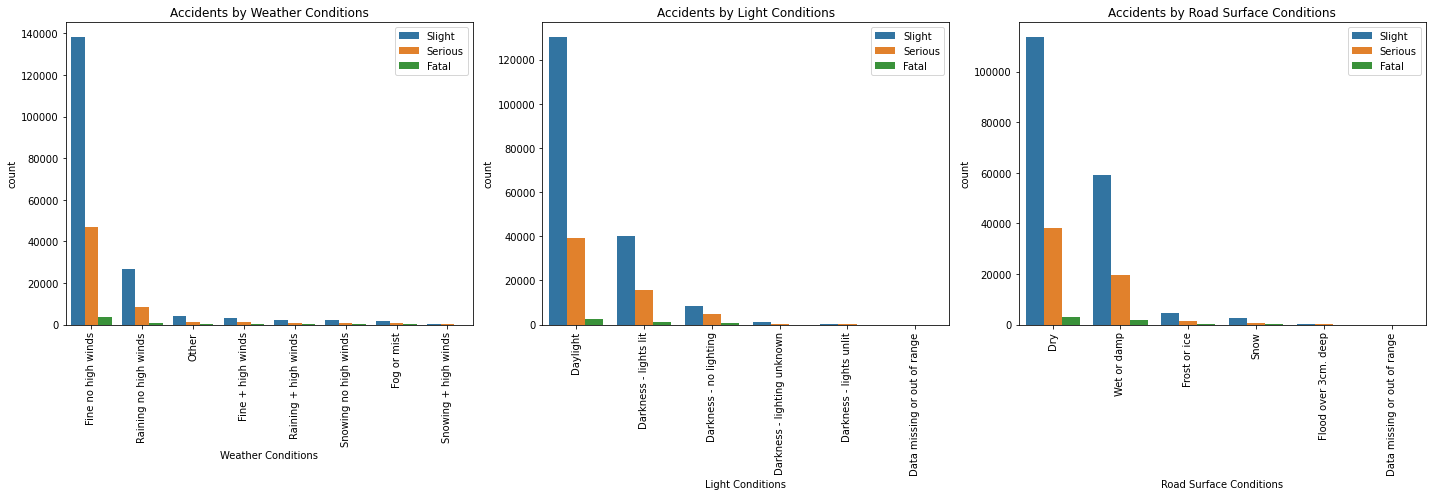

In [29]:
plt.figure(figsize=(20, 7))
plt.tight_layout()
plt.subplot(1,3,1)
plt.title('Accidents by weather_conditions')
plot_countplt_with_sev(df, "weather_conditions")
plt.xticks(rotation=90)
plt.tight_layout()
plt.subplot(1,3,2)
plot_countplt_with_sev(df, "light_conditions")
plt.xticks(rotation=90)
plt.tight_layout()
plt.subplot(1,3,3)
plot_countplt_with_sev(df, "road_surface_conditions")
plt.xticks(rotation=90)
plt.show()

A combination of fine weather, no high winds, daylight, and dry conditions is most likely to cause an accident in general and also **more instances of serious and fatal accidents** appear in these environmental conditions. The count of slight severity accidents is again, the highest for all conditions. 

Weather of fine, no winds is the most common weather condition for all types of accident severities. Similarily, Daylight is the most common light condiiton for all types of severities and Dry is the most common road_surface_condition for all types of severities. 

### What is the relationship between speed_limit and number_of_casualties and whether accident severity is involved in this relationship or not? 

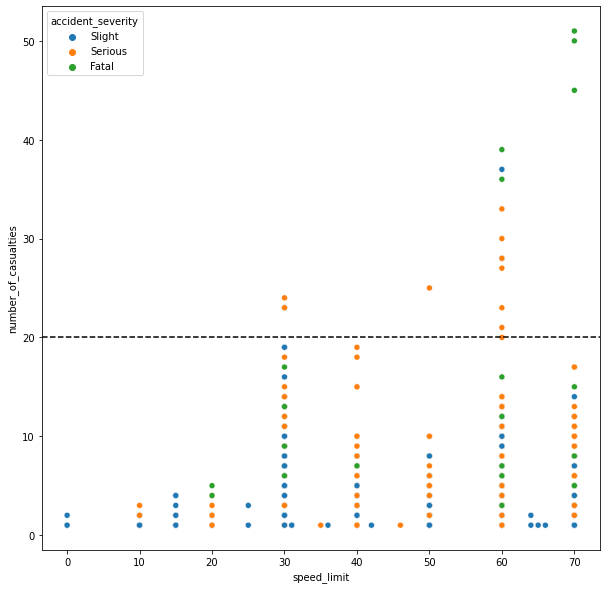

In [30]:
plt.figure(figsize=(10, 10))
# sns.scatterplot(data=df, x="speed_limit", y="number_of_casualties", hue="accident_severity")
# plt.show()

num_plot = sns.scatterplot( data=df, x="speed_limit", y="number_of_casualties", hue="accident_severity")
num_plot.axhline(20, ls='--', color="black")
plt.show()


most of the accidents happeining at speed 60 are serious. Generally,  instances of larger number of casualties (above 20) appear more often at higher speed limits (30 and above), with the highest number of causalities (50+) appearing at speedlimit 70 where accidents were fatal. 

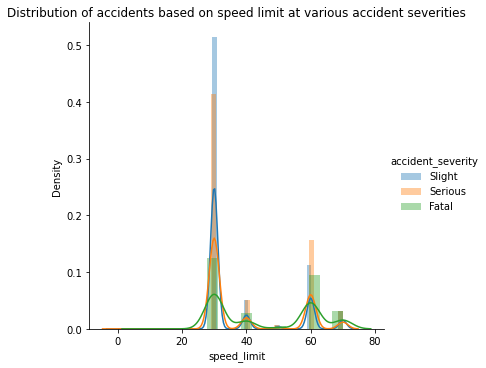

In [31]:
import warnings
warnings.filterwarnings("ignore")

sns.FacetGrid(df, height=5, hue="accident_severity").map(sns.distplot, "speed_limit").add_legend()
plt.title('Distribution of accidents based on speed limit at various accident severities')
plt.show()

more accidents appear at speed_limit of 30 with most of the being slight. At speed_limit 60, more accidents are serious than slight. 

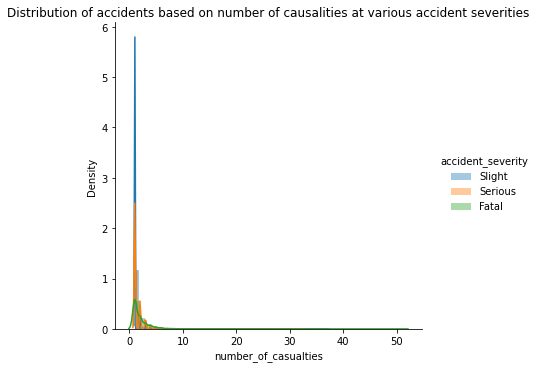

In [32]:
sns.FacetGrid(df, height=5, hue="accident_severity").map(sns.distplot, "number_of_casualties").add_legend()
plt.title('Distribution of accidents based on number of causalities at various accident severities')
plt.show()

### Is there a correlation between accident_severity, number_of_vehicles, number_of_casualties and speed_limit? 

In [33]:
df_acc_severity= df.replace({'accident_severity': {'Slight': 0, 'Serious': 1, 'Fatal': 2}})

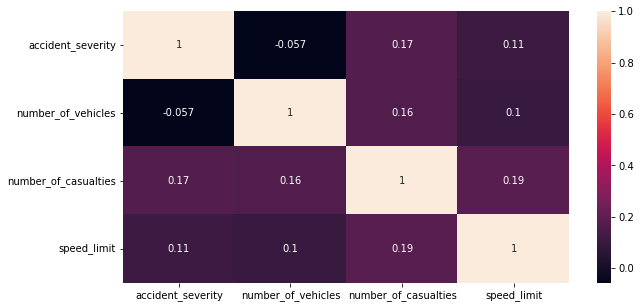

In [34]:
plt.figure(figsize=(10,5))
df_acc_severity= df.replace({'accident_severity': {'Slight': 0, 'Serious': 1, 'Fatal': 2}})
sns.heatmap(df_acc_severity[['accident_severity','number_of_vehicles', 'number_of_casualties', 'speed_limit']].corr(), annot=True)

There is generally no strong correlation between accident_severity, number_of_vehicles, number_of_casualties, and speed_limit, as the correlation values are very small( below 0.2)

###  Which is the month with the most accidents?

In [35]:
import calendar

# preparing to plot monthly patterns
month_list = ['January', 'February', 'March', 'April', 'May', 'June', 
              'July', 'August', 'September', 'October', 'November', 
              'December']

monthLength_list = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]

tripleMonthLength_list = [31, 31, 31, 28, 28, 28, 31, 31, 31, 30, 30, 30, 
                          31, 31, 31, 30, 30, 30, 31, 31, 31, 31, 31, 31,
                          30, 30, 30, 31, 31, 31, 30, 30, 30, 31, 31, 31]

In [36]:
#preparing data to plot
df_trafficDataByMonth = df[['date', 'accident_reference','accident_severity']].copy()
df_trafficDataByMonth.index =  pd.to_datetime(df['date'], format='%d/%m/%Y')

df_trafficDataByMonth = pd.DataFrame(df_trafficDataByMonth.resample('M').count()['accident_reference'])
df_trafficDataByMonth = df_trafficDataByMonth.reset_index()[['date', 'accident_reference']]
df_trafficDataByMonth.rename(columns={'accident_reference':'Accident Count'}, inplace=True )

df_trafficDataByMonth['Month Length'] = monthLength_list

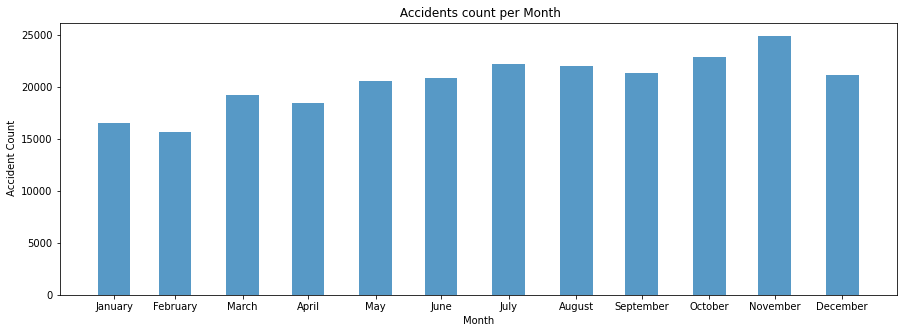

In [37]:
plt.rcParams['figure.figsize'] = [15,5]
plt.bar(df_trafficDataByMonth['date'], df_trafficDataByMonth['Accident Count'],  width=15, align='center', tick_label=month_list, alpha=0.75)
plt.title(" Accidents count per Month")
plt.xlabel("Month")
plt.ylabel(" Accident Count")

df_trafficDataByMonth['Date'] = month_list

plt.show()

we will apply normalisation in the next plot: 

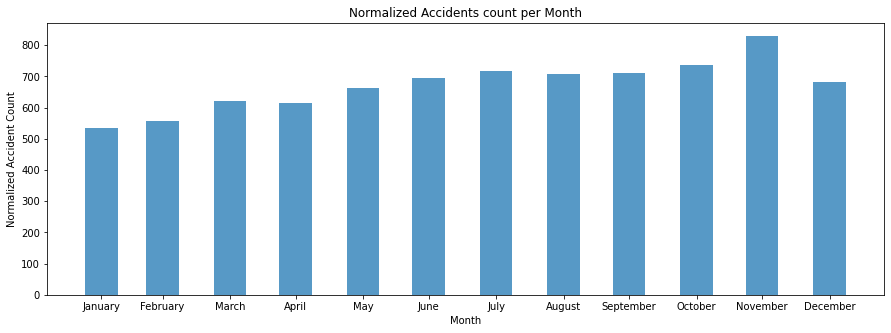

In [38]:

plt.rcParams['figure.figsize'] = [15,5]
plt.bar(df_trafficDataByMonth['date'], df_trafficDataByMonth['Accident Count']/df_trafficDataByMonth['Month Length'],  width=15, align='center', tick_label=month_list, alpha=0.75)
plt.title("Normalized Accidents count per Month")
plt.xlabel("Month")
plt.ylabel("Normalized Accident Count")

df_trafficDataByMonth['Date'] = month_list

plt.show()

From the raw data, Febraury had the least number of accidents, and Novemeber had the most number of accidents. However we decided to normalize the months because each month has different number of days.


###  At what hour of the day do most car accidents occur and how do they differ with severity?

Text(0, 0.5, 'Normalized Accident Count')

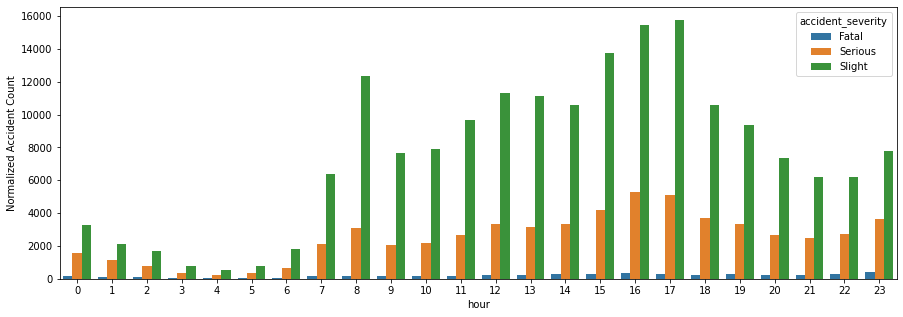

In [39]:
df_acc_hr = df[['time', 'accident_reference', 'accident_severity']].copy()

df_acc_hr['time'] = pd.to_datetime(df_acc_hr['time'])

df_acc_hr.index = df_acc_hr['time']
df_acc_hr['hour'] = df_acc_hr.index.hour
df_acc_hr = pd.DataFrame(df_acc_hr.groupby(['hour', 'accident_severity']).\
                                count()['accident_reference'])

df_acc_hr.reset_index(inplace=True)
df_acc_hr[['hour','accident_severity', 
                  'accident_reference']]


# normalize
df_acc_hr['accident_reference'] = df_acc_hr['accident_reference']
accidentSeverityhr_plt = sns.barplot(x='hour', y='accident_reference', 
                                          data=df_acc_hr, 
                                          hue='accident_severity', 
                                          )
plt.ylabel("Normalized Accident Count")

In general, most accidents occur at 16-17 then at 8. Slight accidents were always the most frequent. 

### At which day do most accidents appear?

Text(0, 0.5, 'Normalized Accident Count')

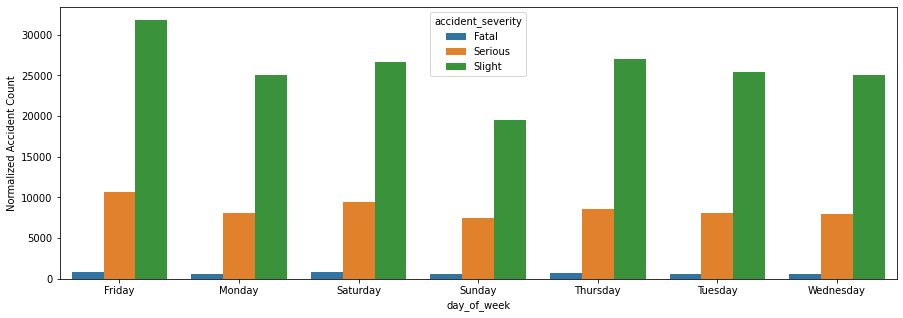

In [40]:
df_acc_day = df[['day_of_week', 'accident_reference', 'accident_severity']].copy()

df_acc_day.index = df_acc_day['day_of_week']
del df_acc_day['day_of_week']
df_acc_day = pd.DataFrame(df_acc_day.groupby(['day_of_week', 'accident_severity']).\
                                count()['accident_reference'])

df_acc_day.reset_index(inplace=True)
df_acc_day[['day_of_week','accident_severity', 
                  'accident_reference']]


# normalize
df_acc_day['accident_reference'] = df_acc_day['accident_reference']
accidentSeverityhr_plt = sns.barplot(x='day_of_week', y='accident_reference', 
                                          data=df_acc_day, 
                                          hue='accident_severity', 
                                          )
# plt.title("Normalized accident_severity by Month", size=16)
plt.ylabel("Normalized Accident Count")

Friday witnessed the highest number of accidents in 1985. Accidents of fatal severities are almost not affected by the day of the week since they are generally the same count. However, slight and serious severities fluctuate slightly over different day types, with Friday being the most common occurence for both slight and serious accident severities. 

### Severity per location

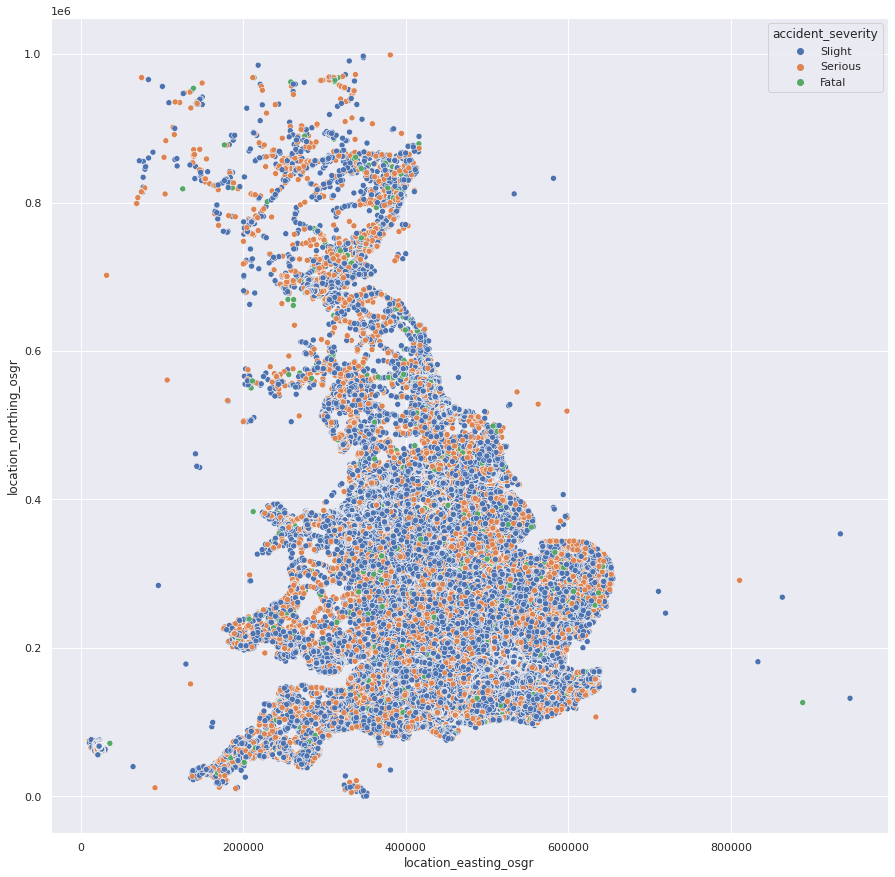

In [41]:
sns.set(rc={"figure.figsize":(15, 15)})
sns.scatterplot( data = df, x='location_easting_osgr', y='location_northing_osgr', hue='accident_severity')

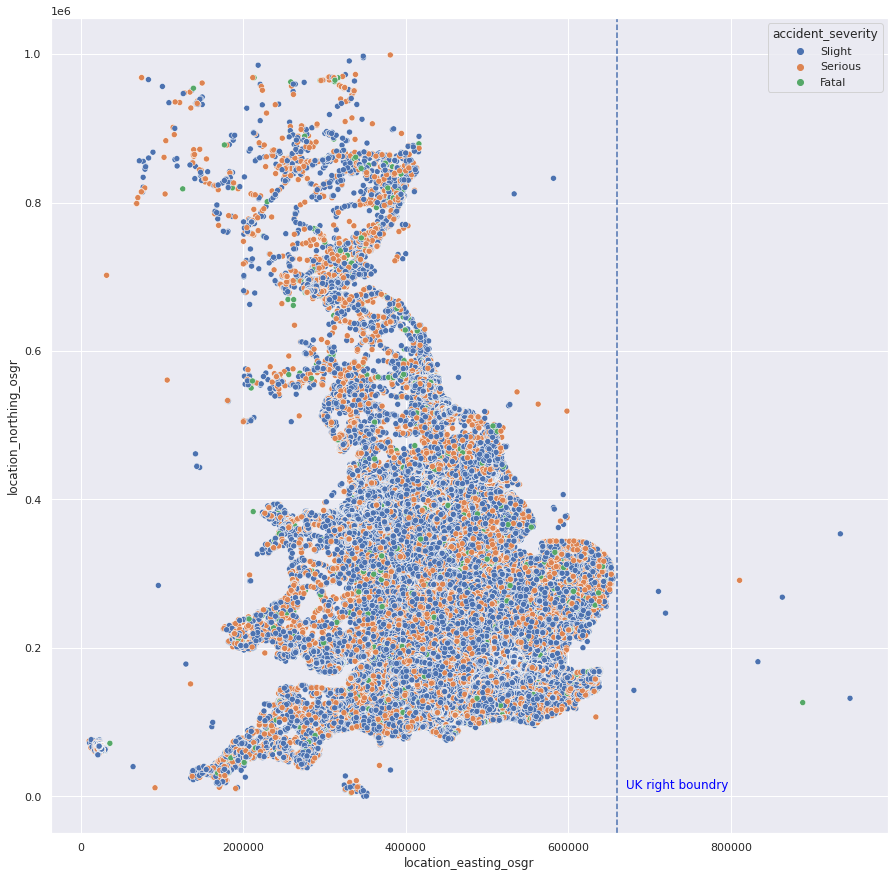

In [42]:
map_plot = sns.scatterplot( data = df, x='location_easting_osgr', y='location_northing_osgr', hue='accident_severity')
map_plot.axvline(660000, ls='--')
map_plot.text(670500, 10000, "UK right boundry", c='blue')
plt.show()

We could consider the points on the right of the plotted boundry to be outlier. This will be handled in the outliers section

### Police force per location

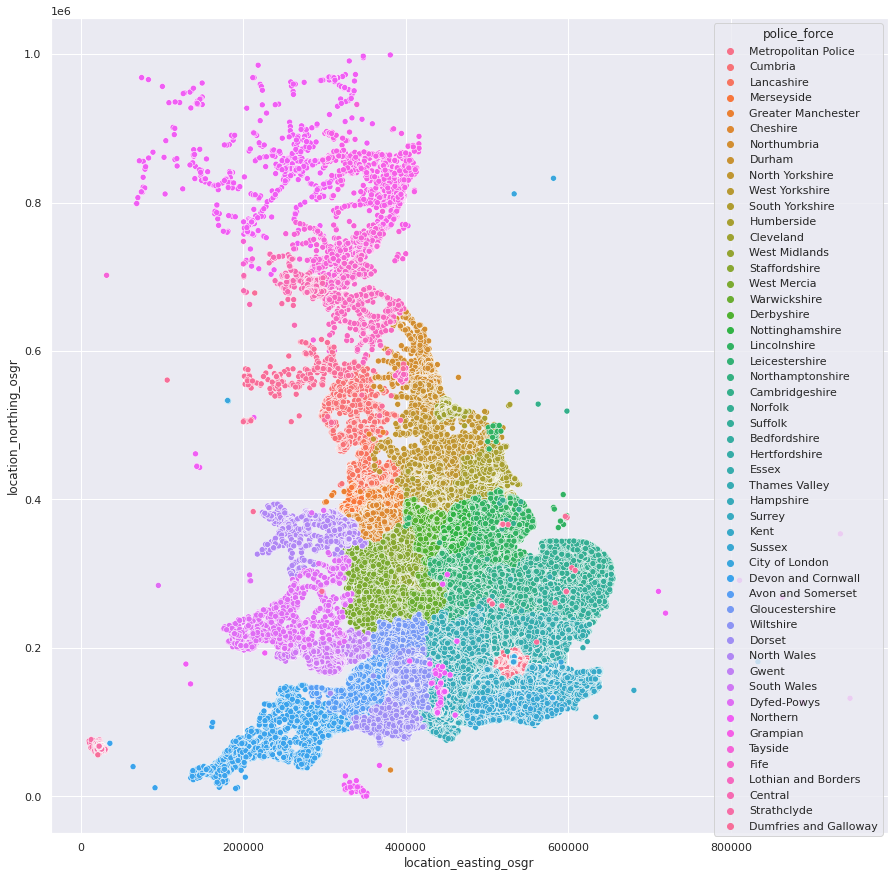

In [43]:
sns.set(rc={"figure.figsize":(15, 15)})
sns.scatterplot( data = df, x='location_easting_osgr', y='location_northing_osgr', hue='police_force')

# Feature Engineering

We derive extra features that will help us in cleaning and make more sense of the data after performing some analysis as you can see above. 

Add Month name to data set columns

In [56]:
import copy

df_F = copy.deepcopy(df)

In [57]:
import calendar

df_F['date'] =  pd.to_datetime(df_F['date'], format='%d/%m/%Y')

# extracting the day of the month 
df_F['drv_day_number'] = pd.DatetimeIndex(df_F['date']).day
# extracting the month number 
df_F['drv_month_number'] = pd.DatetimeIndex(df_F['date']).month
# extracting the month name 
df_F['drv_month_name'] = df_F['drv_month_number'].apply(lambda x: calendar.month_abbr[x])

In [58]:
df_F['drv_month_name'].value_counts()

Nov    24885
Oct    22835
Jul    22183
Aug    21966
Sep    21309
Dec    21144
Jun    20868
May    20560
Mar    19224
Apr    18436
Jan    16525
Feb    15618
Name: drv_month_name, dtype: int64

Adding hour that the accident occured at to dataset columns

In [59]:
# extracing hour time 
df_F['hour']=df_F['time'].astype('datetime64[ns]').dt.hour
df_F['hour']

accident_index
198501AD00001    16
198501AD00002    16
198501AD00003    16
198501AD00004    12
198501AD00005    16
                 ..
198598T038776    17
198598T038877    20
198598T038978     1
198598T039079     1
198598T039180    21
Name: hour, Length: 245553, dtype: int64

Adding Week Number to df

In [60]:
def weekNumber(df):
    draft_week_number = []
    count = len(df["date"])

    for i in range(0, count):
        #d/m
        date =  df["date"][i]
        # print(date)
        start = ((date.month - 1) * 4) + 1
        # end = start + 3
        day = date.day
        # print(day)
        if(day >= 1 and day <= 7):
            draft_week_number.append(start)
            # print(start)
        if(day >= 8 and day <= 15):    
            draft_week_number.append(start+1)
            # print(start+1)
        if(day >= 16 and day <= 23):    
            draft_week_number.append(start+2)
            # print(start+2)
        if(day >= 24):    
            draft_week_number.append(start+3)
            # print(start+3)

    return draft_week_number


In [61]:
week_number = weekNumber(df_F)
df_F['week_number'] = week_number

In [62]:
df_F[['week_number','date']]

,week_number,date
accident_index,,
198501AD00001,1,1985-01-07
198501AD00002,2,1985-01-11
198501AD00003,2,1985-01-12
198501AD00004,2,1985-01-11
198501AD00005,2,1985-01-10
...,...,...
198598T038776,10,1985-03-10
198598T038877,10,1985-03-10
198598T038978,10,1985-03-08


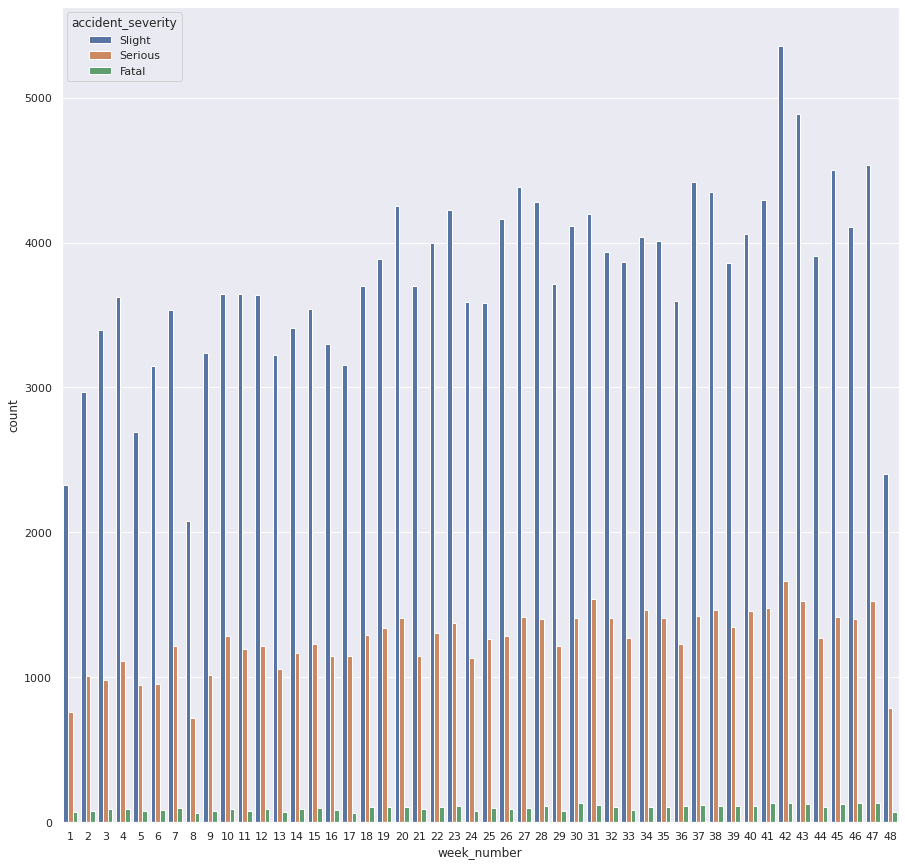

In [63]:
sns.countplot(x='week_number', data=df_F,hue="accident_severity")

Week 42 of the year 1985 had the highest number of accidents (and slight accidents).

# Scaling

number of casualities and vehicles


In [64]:
print(df_F.number_of_casualties.dtype)

int64


In [65]:
df_F.number_of_casualties.isnull().sum()

0

In [66]:
df_F[(df_F.number_of_casualties < 0)]['number_of_casualties']

Series([], Name: number_of_casualties, dtype: int64)

In [67]:
from sklearn.preprocessing import MinMaxScaler

number_of_casualties_original = df_F.number_of_casualties 
number_of_casualties_scaled = MinMaxScaler().fit_transform(df_F[["number_of_casualties"]]) 

print("Old Minimum ", min(number_of_casualties_original))
print("Old Maximum ", max(number_of_casualties_original))
print("New Minimum ", min(number_of_casualties_scaled))
print("New Maximum ", max(number_of_casualties_scaled))

Old Minimum  1
Old Maximum  51
New Minimum  [0.]
New Maximum  [1.]


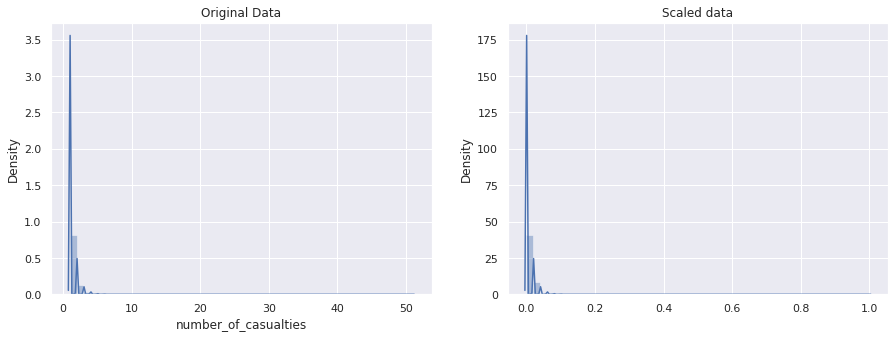

In [68]:
plt.rcParams['figure.figsize'] = [15,5]

fig, ax=plt.subplots(1,2)
sns.distplot(number_of_casualties_original, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(number_of_casualties_scaled, ax=ax[1])
ax[1].set_title("Scaled data")
plt.show()

In [69]:
number_of_vehicles_original = df_F.number_of_vehicles 
number_of_vehicles_scaled = MinMaxScaler().fit_transform(df_F[["number_of_vehicles"]]) 

print("Old Minimum ", min(number_of_vehicles_original))
print("Old Maximum ", max(number_of_vehicles_original))
print("New Minimum ", min(number_of_vehicles_scaled))
print("New Maximum ", max(number_of_vehicles_scaled))

Old Minimum  1
Old Maximum  31
New Minimum  [0.]
New Maximum  [1.]


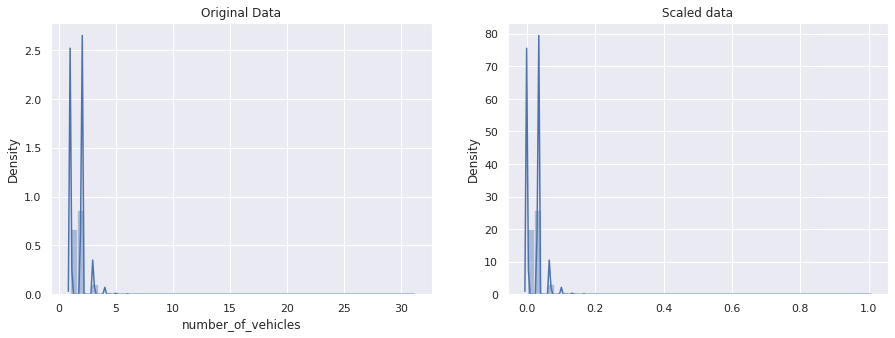

In [70]:
plt.rcParams['figure.figsize'] = [15,5]

fig, ax=plt.subplots(1,2)
sns.distplot(number_of_vehicles_original, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(number_of_vehicles_scaled, ax=ax[1])
ax[1].set_title("Scaled data")
plt.show()

# Missing Values and Outliers

In [71]:
df_M = copy.deepcopy(df_F) 

Dropping columns that do not have any values (all nulls)

In [72]:

def drop_null_cols(df_in):
    print('Dataset columns before dropping all null and missing columns: ')
    print([c for c in df_in.columns])
    print()
    print('--------------------------------------------')
    print('--------------------------------------------')
    print()

    for col in df_in.columns:
        if(df_in[col].isnull().sum() == df_in.shape[0] or (len(df_in[col].value_counts())==1 and (df_in[col].value_counts().index[0] == 'Data missing or out of range') or df_in[col].value_counts().index[0] == -1)):
            df_in.drop([col], axis=1, inplace=True)

    print('Dataset columns after droping: ')
    print([c for c in df_in.columns])
             

Replacing column with less 2% null values with mode. ( handling MCAR ) 

In [73]:
def replace_with_mode(df_in, value_to_be_replaced):

  for c in df_in.columns:

    if( df_in[c].isin([value_to_be_replaced]).sum()>0 ):

      print(f'Column Name: {c}')
      print()
      
      # is missing value frequency less than thres    
      if((len(df_in[df_in[c]==value_to_be_replaced])/len(df_in))*100 <= 2.0):
      # if( (np.isnan(value_to_be_replaced) and (len(df_in[df_in[c].isnull()].sum())/len(df_in))*100 <= 2.0)  
      # or (np.isnan(value_to_be_replaced)==False and (len(df_in[df_in[c]==value_to_be_replaced])/len(df_in))*100 <= 2.0)):


        print("Value counts before: ")
        print(df_in[c].value_counts())

        print("-----------------------------")

        variable_mode = df_in[c].mode()[0]
        df_in[c].replace([value_to_be_replaced],variable_mode, True)
        print("Value counts after: ")
        print(df_in[c].value_counts())

      else:
        print(f"Precentage  of rows containing {value_to_be_replaced} is greater than 2% ")
      
      print()
      print('----------------------------------')
      print('----------------------------------')     
      print()   

A method to replace a value in a column with a values based on another value in a separate column/feature. (handling MAR)

In [74]:
def handle_no_junction(df_in, feature_to_be_modified, feature_for_imputing, value_to_compare, replacement ):

    df_in[feature_to_be_modified].mask(df_in[feature_for_imputing] == value_to_compare, replacement, inplace=True)
    print(df_in[feature_to_be_modified].value_counts())

Dropping columns with all null values: 

In [75]:
drop_null_cols(df_M)

Dataset columns before dropping all null and missing columns: 
['accident_year', 'accident_reference', 'location_easting_osgr', 'location_northing_osgr', 'longitude', 'latitude', 'police_force', 'accident_severity', 'number_of_vehicles', 'number_of_casualties', 'date', 'day_of_week', 'time', 'local_authority_district', 'local_authority_ons_district', 'local_authority_highway', 'first_road_class', 'first_road_number', 'road_type', 'speed_limit', 'junction_detail', 'junction_control', 'second_road_class', 'second_road_number', 'pedestrian_crossing_human_control', 'pedestrian_crossing_physical_facilities', 'light_conditions', 'weather_conditions', 'road_surface_conditions', 'special_conditions_at_site', 'carriageway_hazards', 'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident', 'trunk_road_flag', 'lsoa_of_accident_location', 'drv_day_number', 'drv_month_number', 'drv_month_name', 'hour', 'week_number']

--------------------------------------------
------------------------

### Handling first_road_number and second_road_number

Almost 37.5% of the values of the first_road_number could be replaced with zero.
and only 14 cells are null                            

In [76]:
((df_M['first_road_number'].value_counts()['first_road_class is C or Unclassified. These roads do not have official numbers so recorded as zero ']
/len(df_M))*100)

37.44324035951506

In [77]:
print(df_M['first_road_number'].value_counts())

print('count of nulls:')
print(df_M['first_road_number'].isnull().sum())

first_road_class is C or Unclassified. These roads do not have official numbers so recorded as zero     91943
6.0                                                                                                      2428
1.0                                                                                                      2351
4.0                                                                                                      2319
40.0                                                                                                     1608
                                                                                                        ...  
9101.0                                                                                                      1
9007.0                                                                                                      1
9150.0                                                                                                      1
889.0     

In [78]:
print(df_M['second_road_number'].value_counts())

print('count of nulls:')
print(df_M['second_road_number'].isnull().sum())

first_road_class is C or Unclassified. These roads do not have official numbers so recorded as zero     119898
4.0                                                                                                        379
6.0                                                                                                        268
1.0                                                                                                        233
40.0                                                                                                       221
                                                                                                         ...  
3399.0                                                                                                       1
2153.0                                                                                                       1
2155.0                                                                                                       1
2

Replace 'first_road_class is C or Unclassified. These roads do not have official numbers so recorded as zero ' with 0 in both first and second road number features. This type of missing value is MAR ( since we have a reason why it's missing which is that the first_road_class being C or Unclassified type )

In [79]:
replace_with_zero = 'first_road_class is C or Unclassified. These roads do not have official numbers so recorded as zero '
df_M.replace({ "first_road_number": {replace_with_zero: 0.0 }}, inplace = True)
df_M['first_road_number'].value_counts()

0.0       91943
6.0        2428
1.0        2351
4.0        2319
40.0       1608
          ...  
9101.0        1
9007.0        1
9150.0        1
889.0         1
5398.0        1
Name: first_road_number, Length: 3424, dtype: int64

In [80]:
replace_with_zero = 'first_road_class is C or Unclassified. These roads do not have official numbers so recorded as zero '
df_M.replace({ "second_road_number": {replace_with_zero: 0.0 }}, inplace = True)
df_M['second_road_number'].value_counts()

0.0       119898
4.0          379
6.0          268
1.0          233
40.0         221
           ...  
3399.0         1
2153.0         1
2155.0         1
2236.0         1
715.0          1
Name: second_road_number, Length: 2855, dtype: int64

Filling null values with -1 in both first and second road number features. We don't have a reason why they are missing, and their values can not be deduced from other features, hence MNAR. We handle this column by using another constant -1. 

In [81]:
print(df_M['first_road_number'].isnull().sum())
df_M["first_road_number"].fillna( value=-1, inplace = True)
# df_M["first_road_number"].replace(np.nan, -1, inplace=True)
print(df_M['first_road_number'].isnull().sum())

14
0


In [82]:
print(df_M['second_road_number'].isnull().sum())
df_M["second_road_number"].fillna( value=-1, inplace = True)
# df_M["first_road_number"].replace(np.nan, -1, inplace=True)
print(df_M['second_road_number'].isnull().sum())

98340
0


### Junction Control

In [83]:
((df_M['junction_control'].value_counts()['Data missing or out of range'])/len(df_M))*100

40.007656188277075

Junction_control column has around (~40%) of missing values, mostly missing because there is no junction. This is MAR. We handle by 1) replacing all junction_control values in rows that has 'Not at junction or within 20 metres' in its junction_detail feature. 2) The rest of the missing values will be considered MCAR so we replace them with the mode (at the bottom of the section ).

In [84]:
df_M['junction_control'].value_counts()

Give way or uncontrolled        125284
Data missing or out of range     98240
Auto traffic signal              18976
Stop sign                         2865
Authorised person                  188
Name: junction_control, dtype: int64

Handling MAR

In [85]:
handle_no_junction(df_M, 'junction_control','junction_detail', 'Not at junction or within 20 metres','No junction')

Give way or uncontrolled        125284
No junction                      98181
Auto traffic signal              18976
Stop sign                         2865
Authorised person                  188
Data missing or out of range        59
Name: junction_control, dtype: int64


### Second road class

In [86]:
df_M['second_road_class'].value_counts()

Unclassified    108278
-1               98331
A                17816
C                11620
B                 8666
Motorway           741
A(M)               101
Name: second_road_class, dtype: int64

Second road will be handled the same as junction control for the same reasons. (but we will replace with 'None' instead). This type is MAR since we are imputing the missing values using another feature in the dataset. 

In [87]:
handle_no_junction(df_M, 'second_road_class','junction_detail', 'Not at junction or within 20 metres','None')

Unclassified    108278
None             98181
A                17808
C                11620
B                 8665
Motorway           741
-1                 159
A(M)               101
Name: second_road_class, dtype: int64


We choose the mode of the second road based on the junction detail. As sometimes there won't be a second road when there is no junction. This type of missing values is MCAR. 

In [88]:
modeOfSecondRoadClassBasedOnJunctionDetail = df_M.groupby(['junction_detail'])['second_road_class'].agg(lambda x: pd.Series.mode(x)[0])
print("Mode Of Second Road Class Based On Junction Detail:")
print(modeOfSecondRoadClassBasedOnJunctionDetail)

Mode Of Second Road Class Based On Junction Detail:
junction_detail
Crossroads                             Unclassified
Data missing or out of range                     -1
Mini-roundabout                        Unclassified
More than 4 arms (not roundabout)      Unclassified
Not at junction or within 20 metres            None
Other junction                         Unclassified
Private drive or entrance              Unclassified
Roundabout                                        A
Slip road                              Unclassified
T or staggered junction                Unclassified
Name: second_road_class, dtype: object


In [89]:
second_road_class_dict = modeOfSecondRoadClassBasedOnJunctionDetail.to_dict()

In [90]:
df_secondRoad_temp = df_M['junction_detail'].map(second_road_class_dict)

Imputing missing values with the mode based on the type of junction detail. 

In [91]:
df_M['second_road_class'] = np.where(df_M['second_road_class']=='-1', df_secondRoad_temp, df_M['second_road_class'])

In [92]:
df_M['second_road_class'].value_counts()

Unclassified    108433
None             98181
A                17809
C                11620
B                 8665
Motorway           741
A(M)               101
-1                   3
Name: second_road_class, dtype: int64

### Road Type missing values 

We will impute the missing values of the road type using the mode based on the road class because it it MAR (same idea as second road class as we are imputing based on the mode of the certain value in another feature ) 

In [93]:
df_M['road_type'].value_counts()

Single carriageway          198757
Dual carriageway             28710
Roundabout                    9769
One way street/Slip road      7248
Name: road_type, dtype: int64

In [94]:
modeRoadType = df_M.groupby(['first_road_class'])['road_type'].agg(lambda x: pd.Series.mode(x)[0])
modeRoadType

first_road_class
-1                Dual carriageway
A               Single carriageway
A(M)              Dual carriageway
B               Single carriageway
C               Single carriageway
Motorway          Dual carriageway
Unclassified    Single carriageway
Name: road_type, dtype: object

In [95]:
roadType_dict = modeRoadType.to_dict()

In [96]:
df_roadType_temp = df_M['first_road_class'].map(roadType_dict)
df_roadType_temp

accident_index
198501AD00001    Single carriageway
198501AD00002    Single carriageway
198501AD00003    Single carriageway
198501AD00004    Single carriageway
198501AD00005    Single carriageway
                        ...        
198598T038776    Single carriageway
198598T038877    Single carriageway
198598T038978    Single carriageway
198598T039079    Single carriageway
198598T039180    Single carriageway
Name: first_road_class, Length: 245553, dtype: object

In [97]:
df_M['road_type'] = np.where(df_M['road_type'].isnull(), df_roadType_temp, df_M['road_type'])

In [98]:
df_M['road_type'].value_counts()

Single carriageway          199819
Dual carriageway             28717
Roundabout                    9769
One way street/Slip road      7248
Name: road_type, dtype: int64

### Drop the rows where we have location_easting_osgr and location_northing_osgr as null values

because this is less than 0.1% of the data (MCAR)

In [99]:
(df_M['location_easting_osgr'].isnull().sum()/len(df_M))*100

0.010588345489568444

In [100]:
df_M.dropna(subset=['location_easting_osgr', 'location_northing_osgr'], inplace= True)

### Weather conditions 

In [101]:
df_M.weather_conditions.value_counts()

Fine no high winds       189081
Raining no high winds     35489
Other                      5441
Fine + high winds          4315
Raining + high winds       2989
Snowing no high winds      2978
Fog or mist                2214
Snowing + high winds        572
Name: weather_conditions, dtype: int64

Here we will get the mode weather condition in each month and impute the missing values in this column accordingly. 

Imputing missing with the mode weather condition based on the month. (MAR)

In [102]:
modeWeather = df_M.groupby(['drv_month_name'])['weather_conditions'].agg(lambda x: pd.Series.mode(x)[0])

In [103]:
modeWeather_dict = modeWeather.to_dict()
df_modeWeather_temp = df_M['drv_month_name'].map(modeWeather_dict)
df_M['weather_conditions'] = np.where(df_M['weather_conditions'].isnull(), df_modeWeather_temp, df_M['weather_conditions'])

In [104]:
df_M['weather_conditions'].value_counts()

Fine no high winds       191529
Raining no high winds     35489
Other                      5441
Fine + high winds          4315
Raining + high winds       2989
Snowing no high winds      2978
Fog or mist                2214
Snowing + high winds        572
Name: weather_conditions, dtype: int64

### Light Conditions (missing values and transformation)


In [105]:
df_M['light_conditions'].value_counts()

Daylight                        172346
Darkness - lights lit            56754
Darkness - no lighting           14142
Darkness - lighting unknown       1655
Darkness - lights unlit            614
Data missing or out of range        16
Name: light_conditions, dtype: int64

we can see here that we have two data values that might belong to the Null group: 'Data missing or out of range' and 'Darkness - lighting unknown'


we will make three main categories in this column: daylight, lighting, and darkness. Under darkness, we have three values grouped: Darkness - no lighting, Darkness - lights unlit, Darkness - lighting unknown. For the 'Data missing or out of range', we will determine whether it if is daylight or darkness based on the the time of the day. 

For the data missing or out of range which is likey to be of type MAR, we can infer the light_conditions from the time of day.

generally, sunset starts at 17 and sunrise 6 (24-hr time)

In [106]:
((df_M['hour']>=6) & (df_M['hour']<17)).sum()

142389

first we will handle 'Data missing or out of range' by filling in the missing values by determining whether it is day or night from the time feature. 

In [107]:
missing_light= df_M[df_M['light_conditions'].str.contains('missing')]
missing_light.head(3)

,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,...,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,drv_day_number,drv_month_number,drv_month_name,hour,week_number
accident_index,,,,,,,,,,,,,,,,,,,,,
198501RW00235,1985,01RW00235,542410.0,178940.0,Metropolitan Police,Slight,2,1,1985-05-20,Monday,...,Data missing or out of range,Fine no high winds,Flood over 3cm. deep,None,None,20,5,May,23,19
1985371173800,1985,371173800,616780.0,244390.0,Suffolk,Serious,2,4,1985-10-15,Tuesday,...,Data missing or out of range,Other,Wet or damp,None,None,15,10,Oct,20,38
1985371190200,1985,371190200,610150.0,233480.0,Suffolk,Serious,2,2,1985-11-08,Friday,...,Data missing or out of range,Other,Wet or damp,None,None,8,11,Nov,8,42


In [108]:
missing_light['light_conditions'] = np.where((missing_light['hour']>=6) & (missing_light['hour']<17), 'Daylight', 'Darkness')

replace the old rows in the old dataset with the new ones in missing_light temporary dataset using the update method. 

In [109]:
df_M.update(missing_light)

In [110]:
df_M['light_conditions'].value_counts()

Daylight                       172355
Darkness - lights lit           56754
Darkness - no lighting          14142
Darkness - lighting unknown      1655
Darkness - lights unlit           614
Darkness                            7
Name: light_conditions, dtype: int64

### Dealing with MCAR values

Very few rows have their values missing or out of range for no apparent reason. We consider this to be MCAR (reason that this value is missing is unknown) and we replace it with mode value.

In [111]:
df_M.isnull().sum()

accident_year                              0
accident_reference                         0
location_easting_osgr                      0
location_northing_osgr                     0
police_force                               0
accident_severity                          0
number_of_vehicles                         0
number_of_casualties                       0
date                                       0
day_of_week                                0
time                                       0
local_authority_district                   0
first_road_class                           0
first_road_number                          0
road_type                                  0
speed_limit                                0
junction_detail                            0
junction_control                           0
second_road_class                          0
second_road_number                         0
pedestrian_crossing_human_control          0
pedestrian_crossing_physical_facilities    0
light_cond

These are the columns with low percentage null values: junction_detail, junction_control, pedestrian_crossing_human_control, pedestrian_crossing_physical_facilities, road_surface_conditions, special_conditions_at_site, carriageway_hazards


In [112]:
replace_with_mode(df_M, 'Data missing or out of range')

Column Name: junction_detail

Value counts before: 
Not at junction or within 20 metres    98166
T or staggered junction                86360
Crossroads                             29587
Private drive or entrance              10731
Roundabout                             10488
Other junction                          4145
More than 4 arms (not roundabout)       2917
Slip road                               1896
Mini-roundabout                         1230
Data missing or out of range               7
Name: junction_detail, dtype: int64
-----------------------------
Value counts after: 
Not at junction or within 20 metres    98173
T or staggered junction                86360
Crossroads                             29587
Private drive or entrance              10731
Roundabout                             10488
Other junction                          4145
More than 4 arms (not roundabout)       2917
Slip road                               1896
Mini-roundabout                         1230
Name: 

In [113]:
replace_with_mode(df_M, '-1')

Column Name: first_road_class

Value counts before: 
A               117885
Unclassified     71212
B                31065
C                20722
Motorway          4372
A(M)               270
-1                   1
Name: first_road_class, dtype: int64
-----------------------------
Value counts after: 
A               117886
Unclassified     71212
B                31065
C                20722
Motorway          4372
A(M)               270
Name: first_road_class, dtype: int64

----------------------------------
----------------------------------

Column Name: second_road_class

Value counts before: 
Unclassified    108422
None             98166
A                17809
C                11620
B                 8665
Motorway           741
A(M)               101
-1                   3
Name: second_road_class, dtype: int64
-----------------------------
Value counts after: 
Unclassified    108425
None             98166
A                17809
C                11620
B                 8665
Motorway 

In [114]:
df_M.isnull().sum()

accident_year                              0
accident_reference                         0
location_easting_osgr                      0
location_northing_osgr                     0
police_force                               0
accident_severity                          0
number_of_vehicles                         0
number_of_casualties                       0
date                                       0
day_of_week                                0
time                                       0
local_authority_district                   0
first_road_class                           0
first_road_number                          0
road_type                                  0
speed_limit                                0
junction_detail                            0
junction_control                           0
second_road_class                          0
second_road_number                         0
pedestrian_crossing_human_control          0
pedestrian_crossing_physical_facilities    0
light_cond

# Detecting Outliers

In [115]:
df_M.describe()

,accident_year,location_easting_osgr,location_northing_osgr,number_of_vehicles,number_of_casualties,speed_limit,drv_day_number,drv_month_number,hour,week_number
count,245527.0,245527.000000,245527.000000,245527.000000,245527.000000,245527.000000,245527.00000,245527.000000,245527.000000,245527.000000
mean,1985.0,430975.540450,278317.279647,1.701279,1.292660,38.115421,15.62319,6.865135,14.108008,25.964639
std,0.0,120819.418455,156615.718957,0.703635,0.802095,13.413716,8.78905,3.374953,5.416302,13.487055
min,1985.0,10340.000000,200.000000,1.000000,1.000000,0.000000,1.00000,1.000000,0.000000,1.000000
25%,1985.0,375035.000000,173900.000000,1.000000,1.000000,30.000000,8.00000,4.000000,11.000000,15.000000
50%,1985.0,443350.000000,223100.000000,2.000000,1.000000,30.000000,16.00000,7.000000,15.000000,27.000000
75%,1985.0,524590.000000,388105.000000,2.000000,1.000000,40.000000,23.00000,10.000000,18.000000,38.000000
max,1985.0,946500.000000,998900.000000,31.000000,51.000000,70.000000,31.00000,12.000000,23.000000,48.000000


In [116]:
def detectingOutliers(df_in,dfcol):
  
  plt.figure(figsize=(5,10))
  plt.boxplot(df_in[dfcol])
  plt.show()


  Q1 = df_in[dfcol].quantile(0.25)
  Q3 = df_in[dfcol].quantile(0.75)
  IQR = Q3 - Q1
  cut_off = IQR * 1.5
  lower = Q1 - cut_off
  upper =  Q3 + cut_off

  df1 = df_in[df_in[dfcol] > upper]
  df2 = df_in[df_in[dfcol] < lower]
  print()
  print('Total number of outliers are', df1.shape[0]+ df2.shape[0])
  

##### Handling outliers in Location easting osgr

In [117]:
len(df_M)

245527

In [118]:
# drop rows on the right of the boundry only if the % is < 1%
if((len(df_M[df_M['location_easting_osgr']> 660000])/len(df_M))*100 < 1 ):
    df_M.drop( df_M[df_M['location_easting_osgr']> 660000].index, inplace= True)

In [119]:
len(df_M)

245518

### Num vehicles

Most recorded accidents involve 1-3 vehicles.

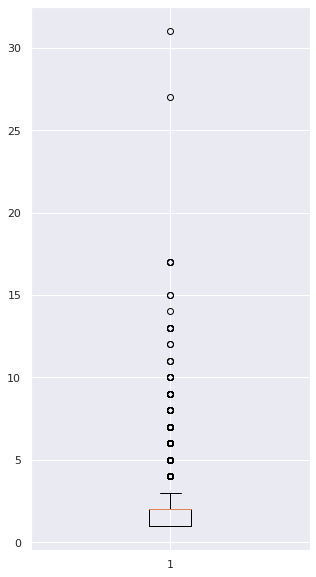


Total number of outliers are 3881


In [120]:
detectingOutliers(df_M,'number_of_vehicles')

### Num casualties

Most recorded accidents involve 1-2 casualities. However we chose not to drop the outliers because they provide useful insights.

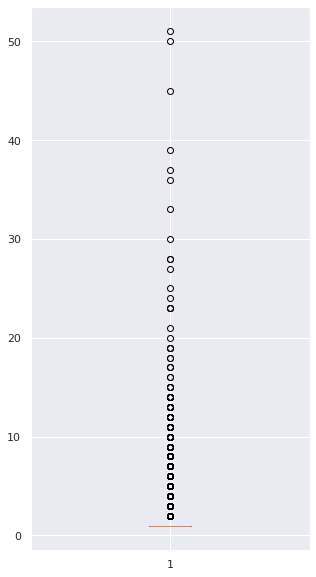


Total number of outliers are 46821


In [121]:
detectingOutliers(df_M,'number_of_casualties')

### Speed limit

Most accidents recorded occured at a speed limit of 30-40. However we chose not to drop the outliers because we'd lose 55393 samples.

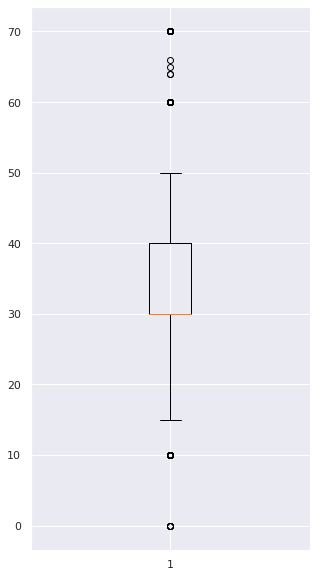


Total number of outliers are 55393


In [122]:
detectingOutliers(df_M,'speed_limit')

### Number of vehicles and Number of casualties

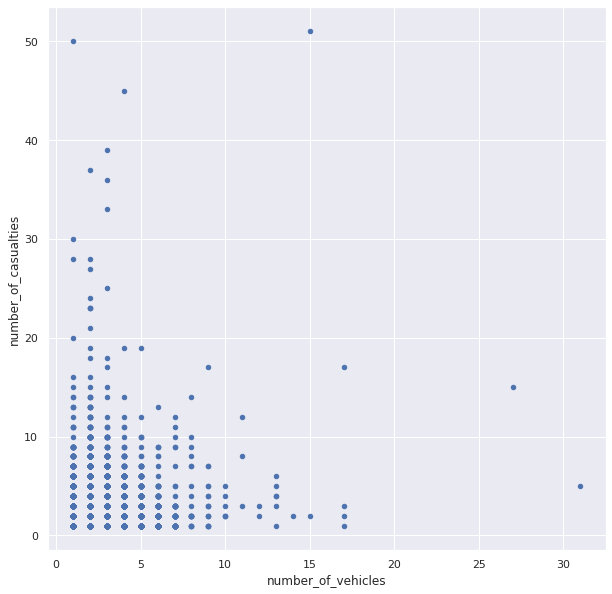

In [123]:

# We expect to see on average, more vehicles = more casualties 
# all the dots are outliers
plt.rcParams['figure.figsize'] = [10,10]

df.plot.scatter(x="number_of_vehicles", y="number_of_casualties")
plt.show()

In [124]:
from sklearn.neighbors import LocalOutlierFactor

clf = LocalOutlierFactor()
X = df_M[['number_of_vehicles','number_of_casualties']].values
y_pred = clf.fit_predict(X)

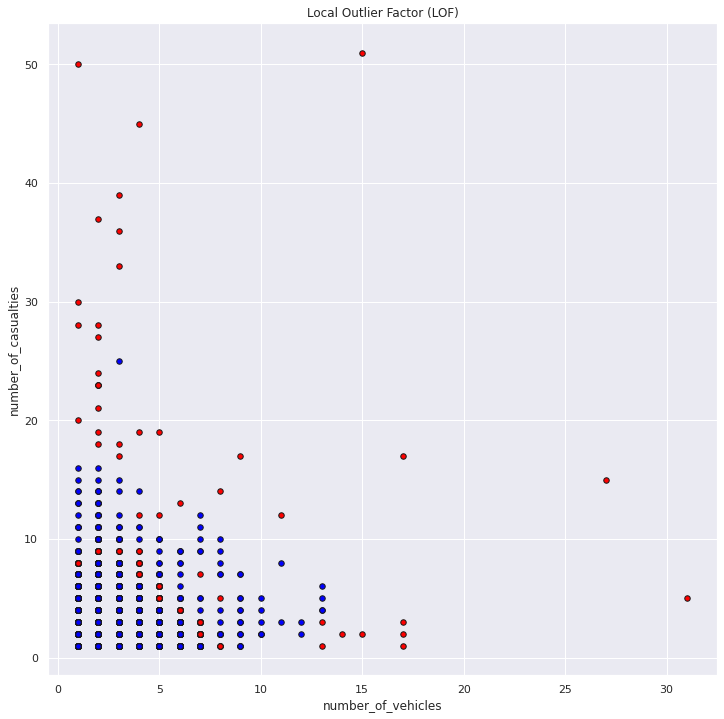

In [125]:
plt.figure(figsize=(12,12))
# plot the level sets of the decision function

in_mask = [True if l == 1 else False for l in y_pred]
out_mask = [True if l == -1 else False for l in y_pred]

plt.title("Local Outlier Factor (LOF)")
# inliers
a = plt.scatter(X[in_mask, 0], X[in_mask, 1], c = 'blue',
                edgecolor = 'k', s = 30)
# outliers
b = plt.scatter(X[out_mask, 0], X[out_mask, 1], c = 'red',
                edgecolor = 'k', s = 30)
plt.axis('tight')
plt.xlabel('number_of_vehicles');
plt.ylabel('number_of_casualties');
plt.show()

Blue is for the normal records and red for outliers. Instances further away from groups are considered outliers. 

# Transformations

In [126]:
df_T= df_M.copy()

In [127]:
from sklearn import preprocessing


# how many to assign top what you want ? 
def calculate_top_categories(df, variable, how_many):
    return [
        x for x in df[variable].value_counts().sort_values(
            ascending=False).head(how_many).index
    ]

# take the df, the feature and the top labels (manually)
def one_hot_encode(df, variable, top_x_labels):
    for label in top_x_labels:
        df[variable + '_' + label] = np.where(
            df[variable] == label, 1, 0) 



def number_encode_features(df_in,column):
    df_in[column] = preprocessing.LabelEncoder().fit_transform(df_in[column])            

### Accident Severity

Label encoding accident severity with Fatal being the most severe thus is mapped to 2, and slight is the least severe thus it is replaced with 0

In [128]:
df_M.accident_severity.value_counts()

Slight     180485
Serious     60266
Fatal        4767
Name: accident_severity, dtype: int64

In [129]:
accident_everity_encoded = df_T.replace({'accident_severity': {'Slight': 0, 'Serious': 1, 'Fatal': 2}})
df_T['accident_severity'] = accident_everity_encoded['accident_severity']

In [130]:
df_T.accident_severity.value_counts()

0    180485
1     60266
2      4767
Name: accident_severity, dtype: int64

### pedestrian_crossing_human_control transformation

In [131]:
df_T.pedestrian_crossing_human_control.value_counts()

None within 50 metres                 244605
Control by school crossing patrol        817
Control by other authorised person        96
Name: pedestrian_crossing_human_control, dtype: int64

convert pedestrian_crossing_human_control to binary column, where 0 means there is no human crossing and 1 indicates that there is human crossing. 

In [132]:
df_T["has_pedestrian_crossing_human_control"] =np.where(df_T['pedestrian_crossing_human_control'].str.contains('None'), 0, 1)

In [133]:
df_T['has_pedestrian_crossing_human_control'].value_counts()

0    244605
1       913
Name: has_pedestrian_crossing_human_control, dtype: int64

### pedestrian_crossing_physical_facilities transformation

In [134]:
df_T.pedestrian_crossing_physical_facilities.value_counts()

No physical crossing facilities within 50 metres                             212655
Pelican, puffin, toucan or similar non-junction pedestrian light crossing     11123
Zebra                                                                         10177
Pedestrian phase at traffic signal junction                                    7613
Central refuge                                                                 2672
Footbridge or subway                                                           1278
Name: pedestrian_crossing_physical_facilities, dtype: int64

convert pedestrian_crossing_physical_facilities to binary column, where 0 means there is no physical crossing and 1 indicates that there is physical crossing.

In [135]:
df_T["has_pedestrian_crossing_physical_facilities"] =np.where(df_T['pedestrian_crossing_physical_facilities'].str.contains('No'), 0, 1)

In [136]:
df_T['has_pedestrian_crossing_physical_facilities'].value_counts()

0    212655
1     32863
Name: has_pedestrian_crossing_physical_facilities, dtype: int64

### Light conditions transformation

In [137]:
df_T['light_conditions'].value_counts()

Daylight                       172348
Darkness - lights lit           56753
Darkness - no lighting          14141
Darkness - lighting unknown      1655
Darkness - lights unlit           614
Darkness                            7
Name: light_conditions, dtype: int64

We can see that we do not have an null values now. Next step, is to categorise light conditions into three main groups: daylight, lighting, darkness where daylight has the largest light intensity source, lighting has lower light intensity since it is still in the dark, and the third type is darkness which has the lowest/np light source. 

In [138]:
df_T['light_conditions'] = np.where(df_T['light_conditions'].str.contains('lights lit'), 'Lighting', df_T['light_conditions'])
df_T['light_conditions'] = np.where(df_T['light_conditions'].str.contains('Darkness'), 'Darkness', df_T['light_conditions'])

In [139]:
df_T['light_conditions'].value_counts()

Daylight    172348
Lighting     56753
Darkness     16417
Name: light_conditions, dtype: int64

We have three groups now. Next, we'll use label encoding and give a number to each value based on the degree of light intensity, where 0 is considered the lowest (darkness), 1 is considered intermediate intensity (lighting) and 2 is considered the highest intensity (daylight). 

In [140]:
light_contitions_encoding = { "light_conditions": {"Daylight": 2, "Lighting": 1, "Darkness": 0 }}
df_T.replace(light_contitions_encoding, inplace=True)

In [141]:
df_T['light_conditions'].value_counts()

2    172348
1     56753
0     16417
Name: light_conditions, dtype: int64

### weather_conditions transformation

In [142]:
df_T['weather_conditions'].value_counts()

Fine no high winds       191522
Raining no high winds     35488
Other                      5440
Fine + high winds          4315
Raining + high winds       2989
Snowing no high winds      2978
Fog or mist                2214
Snowing + high winds        572
Name: weather_conditions, dtype: int64

It is clear that 'Fine no high winds' has the highest number of accidents. We can also not that these values are not atomic since we have two pieces of knowledge for each value ( weather type(fine/raining/snowing/fog) and  wind type(high/low)). Also, the difference in value count of 'Fine no high winds' and the rest is quite large. 

One hot encoding would be suitable to use for this feature since there its type is nominal. To minimise the number of additional features, we will use two new columns, one indicating whether the whether is fine or not and another feature indicating whether the wind is high or not. 

In [143]:
df_T['weather_wind_intensity'] = np.where(((df_T['weather_conditions'].str.contains('no high')) | (df_T['weather_conditions'].str.contains('wind')==False)) , 0, 1)
df_T['weather_wind_intensity'].value_counts()

0    237642
1      7876
Name: weather_wind_intensity, dtype: int64

Fine weather will get a value of 1, else we will have 0 in the column. 

In [144]:
df_T['weather_is_fine'] = np.where(((df_T['weather_conditions'].str.contains('Fine'))) , 1, 0)
df_T['weather_is_fine'].value_counts()

1    195837
0     49681
Name: weather_is_fine, dtype: int64

In [145]:
df_T['weather_is_other'] = np.where(((df_T['weather_conditions'].str.contains('Other'))) , 1, 0)
df_T['weather_is_other'].value_counts()

0    240078
1      5440
Name: weather_is_other, dtype: int64

### road_surface_conditions transformation

In [146]:
df_T['road_surface_conditions'].value_counts()

Dry                     154862
Wet or damp              80750
Frost or ice              6352
Snow                      3232
Flood over 3cm. deep       322
Name: road_surface_conditions, dtype: int64

In [147]:
print('percentage dry: ', "%.2f" % ((df_T['road_surface_conditions'].value_counts()[0])/ len(df_T)*100), '% , percentage wet: ',"%.2f" % ((df_T['road_surface_conditions'].value_counts()[1])/ len(df_T)*100),'%')

percentage dry:  63.08 % , percentage wet:  32.89 %


we can see that the total percentage of both dry and wet values is arounf 95%, leaving us with only 5% for the remaining values. 

We will use one encoding for this feature. Examinining the percentages of teh values, we can see that both dry and wet conditions have a signicant effect while the rest isn't as common, hence we will group the rest (frost, snow, and flood) together into another feature: 'Other'. This technique is also called Bin Counting and we are setting the threshold to 7000. 

In [148]:
df_T['road_surface_conditions'] = np.where(((df_T['road_surface_conditions'].str.contains('Wet')) | (df_T['road_surface_conditions'].str.contains('Dry'))) , df_T['road_surface_conditions'], 'Other')

In [149]:
df_T['road_surface_conditions'].value_counts()

Dry            154862
Wet or damp     80750
Other            9906
Name: road_surface_conditions, dtype: int64

In [150]:
road_surface_categories = df_T['road_surface_conditions'].value_counts().index.tolist()
one_hot_encode(df_T,'road_surface_conditions',road_surface_categories)

In [151]:
df_T.columns

Index(['accident_year', 'accident_reference', 'location_easting_osgr',
       'location_northing_osgr', 'police_force', 'accident_severity',
       'number_of_vehicles', 'number_of_casualties', 'date', 'day_of_week',
       'time', 'local_authority_district', 'first_road_class',
       'first_road_number', 'road_type', 'speed_limit', 'junction_detail',
       'junction_control', 'second_road_class', 'second_road_number',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards', 'drv_day_number',
       'drv_month_number', 'drv_month_name', 'hour', 'week_number',
       'has_pedestrian_crossing_human_control',
       'has_pedestrian_crossing_physical_facilities', 'weather_wind_intensity',
       'weather_is_fine', 'weather_is_other', 'road_surface_conditions_Dry',
       'road_surface_conditions_Wet or damp', 'road_su

### special_conditions_at_site transformation

In [152]:
df_T['special_conditions_at_site'].value_counts()

None                                          239630
Roadworks                                       3418
Road surface defective                          1443
Auto traffic signal - out                        414
Road sign or marking defective or obscured       407
Auto signal part defective                       206
Name: special_conditions_at_site, dtype: int64

It seems that the presence of special conditions at side does not have an effect on accidents, since most of the entries were None and looking at the EDA above accident severity was not affected by special conditions at sight. 

To reduce the number of features, we created an indicator variable where 0 means there is no special condition at the site and 1 indicates that there are special conditions. 

In [153]:
df_T['has_special_conditions_at_site'] = np.where( df_T['special_conditions_at_site'] == 'None', 0, 1)  # 0:None 1:Exists
df_T['has_special_conditions_at_site'].value_counts()


0    239630
1      5888
Name: has_special_conditions_at_site, dtype: int64

### carriageway_hazards transformation

In [154]:
df_T['carriageway_hazards'].value_counts()

None                    237779
Other object on road      4560
Other animal on road      1307
Dog on road               1220
Previous accident          398
Vehicle load on road       254
Name: carriageway_hazards, dtype: int64

Presence of carriageway_hazards does not have an effect on accidents, since most of the entries were None and looking at the EDA above accident severity was not affected by special conditions at sight. 

To reduce the number of features, we created an indicator variable where 0 means there is no special condition at the site and 1 indicates that there are special conditions. 

In [155]:
df_T['has_carriageway_hazards'] = np.where(df_T['carriageway_hazards'] == 'None', 0, 1)  # 0:None 1:Exists
df_T['has_carriageway_hazards'].value_counts()


0    237779
1      7739
Name: has_carriageway_hazards, dtype: int64

### junction_control transformation

In [156]:
df_T= df_M.copy()

In [157]:
df_T['junction_control'].value_counts()

Give way or uncontrolled    125332
No junction                  98159
Auto traffic signal          18976
Stop sign                     2863
Authorised person              188
Name: junction_control, dtype: int64

We can divide this feature into three main groups: No junction , uncontrolled, an controlled. We will use label encoding, since the feature type is nominal.

In [158]:
df_T['junction_control'] = np.where(((df_T['junction_control'].str.contains('uncontrolled')) ) , 1, df_T['junction_control'])  # 1:uncontrolled 
df_T['junction_control'] = np.where( ~(df_T['junction_control']==1) & (df_T['junction_control'].str.contains('No junction')) , 0, df_T['junction_control'])  # 0: no junction
df_T['junction_control'] = np.where( ~((df_T['junction_control']==0)) & ~(df_T['junction_control']==1) , 2, df_T['junction_control'])  # 2: Exists some form of junction

In [159]:
df_T['junction_control'].value_counts()

1    125332
0     98159
2     22027
Name: junction_control, dtype: int64

### road type transformation

In [160]:
df_T['road_type'].value_counts()

Single carriageway          199787
Dual carriageway             28714
Roundabout                    9769
One way street/Slip road      7248
Name: road_type, dtype: int64

we will perform one hot encoding for this feature, since its type is nominal and we only have 4 categories. 

In [161]:
road_type_categories = df_T['road_type'].value_counts().index.tolist()
one_hot_encode(df_T,'road_type',road_type_categories)

In [162]:
df_T.columns

Index(['accident_year', 'accident_reference', 'location_easting_osgr',
       'location_northing_osgr', 'police_force', 'accident_severity',
       'number_of_vehicles', 'number_of_casualties', 'date', 'day_of_week',
       'time', 'local_authority_district', 'first_road_class',
       'first_road_number', 'road_type', 'speed_limit', 'junction_detail',
       'junction_control', 'second_road_class', 'second_road_number',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards', 'drv_day_number',
       'drv_month_number', 'drv_month_name', 'hour', 'week_number',
       'road_type_Single carriageway', 'road_type_Dual carriageway',
       'road_type_Roundabout', 'road_type_One way street/Slip road'],
      dtype='object')

### junction detail transformation 

In [163]:
df_T['junction_detail'].value_counts()

Not at junction or within 20 metres    98166
T or staggered junction                86359
Crossroads                             29586
Private drive or entrance              10731
Roundabout                             10488
Other junction                          4145
More than 4 arms (not roundabout)       2917
Slip road                               1896
Mini-roundabout                         1230
Name: junction_detail, dtype: int64

We can deduce that the top two indices here account for 75% percent of the data, this leaves us with 15% which we will group under a new value: 'Other'. Here, we used binning with a threshold count of 30000. 

In [164]:
print('percentage not at junction: ', (df_T['junction_detail'].value_counts()[0])/ len(df_T)*100, '% , percentage T or staggered junction: ', (df_T['junction_detail'].value_counts()[1])/ len(df_T)*100,'%')

percentage not at junction:  39.98321915297453 % , percentage T or staggered junction:  35.17420311341735 %


In [165]:
df_T['junction_detail'].value_counts().index[0]

'Not at junction or within 20 metres'

In [166]:
# binning values into three categories with the third one being 'Other'
df_T['junction_detail'] = np.where(((df_T['junction_detail'].str.contains(df_T['junction_detail'].value_counts().index[0])) | (df_T['junction_detail'].str.contains(df_T['junction_detail'].value_counts().index[1]))) , df_T['junction_detail'], 'Other')  # 0:uncontrolled or not a junction   1: Exists a form of junction control

In [167]:
# check value count
df_T['junction_detail'].value_counts()

Not at junction or within 20 metres    98166
T or staggered junction                86359
Other                                  60993
Name: junction_detail, dtype: int64

In [168]:
#one hot encoding 
junction_detail_categories = df_T['junction_detail'].value_counts().index.tolist()
one_hot_encode(df_T,'junction_detail',junction_detail_categories)

### road class transformation 

According to the information found here (https://www.eastriding.gov.uk/environment/roads-streets-traffic-and-parking/roads-pavements-and-traffic/classification-of-roads/) on how roads are classified, the categories are created based on the type and amount of traffic they are suited for. It appears that 'Motorways' are at the top of the class. 'A' roads are the wide and is of the greatest significance to traffic travelling through the area. 'B' roads are still important routes for traffic, but less so than an A road. 'C' are smaller roads, but has a more important function than an unclassified road. Unclassified roads are local roads with very low significance to the traffic.

Large amounts of traffic and traffic travelling long distances should use higher classes of road (motorways) and smaller amounts of traffic travelling at lower speeds over shorter distances should use lower classes of road (unclassified).

That's why we considered to label it this way. 

In [170]:
df_T.first_road_class.value_counts()

A               117879
Unclassified     71210
B                31065
C                20722
Motorway          4372
A(M)               270
Name: first_road_class, dtype: int64

In [171]:
road_class_encoding = { "first_road_class": {"A": 4, "B": 3, "C": 2, "Unclassified": 1, "Motorway": 5, "A(M)":5 }, "second_road_class": {"A": 4, "B": 3, "C": 2, "Unclassified": 1, "Motorway": 5, "A(M)":5, "None": 0 }}
df_T.replace(road_class_encoding, inplace=True)

In [172]:
df_T['first_road_class'] =  df_T['first_road_class'].astype(int)
df_T['sencond_road_class'] =  df_T['second_road_class'].astype(int)

### speed_limit

We assume that there is no speed limit that is NOT divisible by 10. Thus we bin all the speed_limits to be values with remainder 0 when divided by 10.
Some rows include speed_limit of 0, and it does not make sense that a road where a car moves in has a speed_limit of zero. Thus we replace this value with the 10 (the first bin)

In [173]:
df_T['speed_limit'].value_counts()

30.0    169934
60.0     44160
40.0     17763
70.0     11146
50.0      2336
10.0        78
20.0        43
15.0        41
0.0          5
64.0         2
25.0         2
31.0         2
66.0         1
36.0         1
46.0         1
42.0         1
35.0         1
65.0         1
Name: speed_limit, dtype: int64

In [174]:
df_T['speed_limit']=np.where( df_T['speed_limit']<10, 10, df_T['speed_limit'])
df_T['speed_limit']=np.where(df_T['speed_limit'] % 10>=5, df_T['speed_limit']+(10-df_T['speed_limit'] % 10),df_T['speed_limit']-(df_T['speed_limit'] % 10)  )
df_T['speed_limit'].value_counts()

30.0    169938
60.0     44162
40.0     17766
70.0     11148
50.0      2337
20.0        84
10.0        83
Name: speed_limit, dtype: int64

### local authority district

This feature contained mixed values (name and code), so we decided to split them into two separate features, one for the name and the other for the code, to unify the features type. 



In [175]:

pd.set_option("display.max_rows", None)
df_T["local_authority_district"].value_counts()

Birmingham                      3870
836                             3378
Westminster                     3157
Manchester                      2715
Leeds                           2685
824                             2333
Liverpool                       2331
Lambeth                         2051
Bradford                        1877
Barnet                          1835
Croydon                         1808
Southwark                       1720
Ealing                          1715
Camden                          1711
Sheffield                       1710
Wandsworth                      1660
Bristol, City of                1507
Bromley                         1484
Lewisham                        1469
Kirklees                        1454
Hounslow                        1439
Brent                           1424
Nottingham                      1418
Kingston upon Hull, City of     1411
Enfield                         1395
Leicester                       1393
Greenwich                       1366
H

In [176]:
#fixing local authority district

def dividing_mixed_col(df_in, colname_to_divide, col1_name, col2_name, default_col1, default_col2):

    df_in[col1_name]= np.where(   
    (df_in[colname_to_divide].str.isnumeric()==True) | (df_in[colname_to_divide].str.isnumeric().isnull())
    , df_in[colname_to_divide], default_col1 ).astype(str)

    
    df_in[col2_name]= np.where(   
    (df_in[colname_to_divide].str.isnumeric()==True) | (df_in[colname_to_divide].str.isnumeric().isnull())
    , default_col2, df_in[colname_to_divide] ).astype(str)
    

In [177]:
dividing_mixed_col(df_T, 'local_authority_district', "local_authority_district_code", "local_authority_district_name", 0,  "No Name Recorded" )

local_authority_district_code contains the local authority districtcode if it was recorded in 'local_authority_district' otherwise missing codes were imputed with 0


local_authority_district_name contains the local authority name if it was recorded in 'local_authority_district' otherwise missing names were imputed with "No name"


### Local authority district name

There are too many unique values in this feature and thus we opt for using label encoding to encode it rather than using one hot encoding. We use 0 for "No name"


In [179]:
df_temp_local = copy.deepcopy(df_T) 

In [180]:
number_encode_features(df_temp_local, 'local_authority_district_name')

label encoder assigned 'No name' values with value 184 and another district name with value 0. In this section, we are replacing 184 with 0 and 0 with 184. 


In [181]:
df_temp_local['local_authority_district_name'] = np.where(df_temp_local['local_authority_district_name'] == 0, -1, df_temp_local['local_authority_district_name'] )

In [182]:
df_temp_local['local_authority_district_name'] = np.where(df_temp_local['local_authority_district_name'] == 184, 0, df_temp_local['local_authority_district_name'] )

In [183]:
df_temp_local['local_authority_district_name'] = np.where(df_temp_local['local_authority_district_name'] == -1, 184, df_temp_local['local_authority_district_name'] )

In [ ]:
df_T = df_temp_local.copy()

### Police Force

Here, we applied label encoding. 

In [186]:
number_encode_features(df_T, 'police_force')

### Day of the week


We used label encoding. Since the week starts from Monday, we assigned 0 to it and continued in order. 

In [188]:
df_T.day_of_week.value_counts()

Friday       43375
Saturday     36928
Thursday     36281
Tuesday      34131
Monday       33646
Wednesday    33532
Sunday       27625
Name: day_of_week, dtype: int64

In [189]:
day_of_week_encoding = { "day_of_week": {"Friday": 4, "Saturday": 5, "Sunday": 6, "Monday": 0, "Tuesday":1, "Wednesday":2, "Thursday":3 }}
df_T.replace(day_of_week_encoding, inplace=True)

# Drop redundant columns

(cols that has been can be replaces by the new columns created from one-hot-encoding/ using indicator features)

In [191]:
df_T.columns

Index(['accident_year', 'accident_reference', 'location_easting_osgr',
       'location_northing_osgr', 'police_force', 'accident_severity',
       'number_of_vehicles', 'number_of_casualties', 'date', 'day_of_week',
       'time', 'local_authority_district', 'first_road_class',
       'first_road_number', 'road_type', 'speed_limit', 'junction_detail',
       'junction_control', 'second_road_class', 'second_road_number',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards', 'drv_day_number',
       'drv_month_number', 'drv_month_name', 'hour', 'week_number',
       'road_type_Single carriageway', 'road_type_Dual carriageway',
       'road_type_Roundabout', 'road_type_One way street/Slip road',
       'junction_detail_Not at junction or within 20 metres',
       'junction_detail_T or staggered junction', 'junction

In [192]:
df_T.drop(['local_authority_district','road_type','junction_detail',
            'carriageway_hazards','pedestrian_crossing_physical_facilities','pedestrian_crossing_human_control',
            'weather_conditions','special_conditions_at_site','road_surface_conditions','drv_month_name','time','date'], axis=1, inplace=True)

we dropped accident_year and accident_reference because we can infer them from accident_index. 

In [193]:
df_T.drop(['accident_year','accident_reference'], axis=1, inplace=True)

### Save Pre-processed dataset

In [194]:
# changing index
final_df = df_T.copy()
# final_df.set_index('accident_index')

In [195]:
for c in final_df.columns:
  print(f'Column name: {c}')
  print("Values: ")
  print(final_df[c].value_counts())
  print("-"*20)

Streaming output truncated to the last 5000 lines.
2114.0       10
9096.0       10
3213.0       10
1047.0       10
1192.0       10
891.0        10
1223.0       10
3116.0       10
818.0        10
1095.0       10
524.0        10
5312.0       10
1028.0       10
5380.0       10
2049.0       10
5053.0       10
6173.0       10
6051.0       10
1305.0       10
4179.0       10
5358.0       10
3128.0       10
6165.0       10
1039.0       10
6233.0       10
295.0        10
6162.0       10
475.0        10
6027.0        9
7032.0        9
1261.0        9
6043.0        9
6271.0        9
5065.0        9
4445.0        9
5253.0        9
3329.0        9
6339.0        9
3300.0        9
1459.0        9
1365.0        9
8048.0        9
1241.0        9
799.0         9
4545.0        9
4595.0        9
4587.0        9
834.0         9
9005.0        9
718.0         9
4022.0        9
5126.0        9
1453.0        9
3129.0        9
997.0         9
3215.0        9
8055.0        9
865.0         9
4239.0        9
5244.

Saving to csv: 

In [200]:
final_df.to_csv('1985_Accidents_UK_cleaned.csv', index=False)

In [201]:
final_df = final_df.astype(str)

In [ ]:
#pip install pyarrow

Saving to parquet: 

In [202]:
final_df.to_parquet('1985_Accidents_UK_cleaned.parquet',index=True )

In [203]:
import pandas as pd
pdata = pd.read_parquet('1985_Accidents_UK_cleaned.parquet', engine='pyarrow')